<a href="https://colab.research.google.com/github/aksrao/mlops/blob/main/RR_Car_Price_Prediction_Starter_Akshay_Rao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Vehicle Prices Using Regression Models

## **Objectives**  
The primary goal of this project is to develop a robust regression model to predict used car prices for a reseller based on various listed features and specifications. In addition to predicting prices, the project focuses on identifying feature importance and mitigating overfitting through the application of regularisation techniques.

There can be several business objectives for this, such as:

* **Price Prediction**: Model car prices based on features like mileage, fuel type, and performance.
* **Market Analysis**: Explore trends and preferences in the used car market, by type, region, or other metrics.
* **Feature Importance**: Identify the most important factors influencing car prices (e.g., fuel type, mileage, age).

### **Tasks Overview**
The data pipeline for this task involves the following steps:  
1. **Dataset Overview**   
2. **Data Preprocessing**
3. **Data Visualisation & Exploration**
4. **Model Building**
3. **Regularisation**

## **1 Data Understanding**

| **Variable** | **Description** |
--------|--------------|
| `make_model` | The brand and model of the vehicle (e.g., 'Audi A1'). |
| `body_type` | The body style of the vehicle, such as Sedan, Compact, or Station Wagon. |
| `price`  | The listed price of the car in currency. |
| `vat`  | Indicates the VAT status for the vehicle's price (e.g., VAT deductible, Price negotiable). |
| `km` | The total mileage (in kilometers) of the vehicle, indicating its usage. |
| `Type` | Condition of the vehicle, whether it's 'Used' or 'New'.|
| `Fuel` | Type of fuel the vehicle uses, such as 'Diesel', 'Benzine', etc. |
| `Gears` | The number of gears in the vehicle's transmission. |
| `Comfort_Convenience` | Comfort and convenience features, such as 'Air conditioning', 'Leather steering wheel', 'Cruise control', and more. |
| `Entertainment_Media` | Media features available in the vehicle, including 'Bluetooth', 'MP3', 'Radio', etc. |
| `Extras` | Additional features like 'Alloy wheels', 'Sport suspension', etc.|
| `Safety_Security` | Safety features like 'ABS', 'Airbags', 'Electronic stability control', 'Isofix', etc.  |
| `age` | Age of the car (calculated based on the model year). |
| `Previous_Owners`| The number of previous owners the car has had. |
| `hp_kW` | Engine power in kilowatts (kW), indicating the performance capacity of the engine.|
| `Inspection_new` | Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no). |
| `Paint_Type`| The type of paint on the car, such as 'Metallic', 'Matte', etc. |
| `Upholstery_type` | The material used for the interior upholstery, such as 'Cloth', 'Leather', etc.|
| `Gearing_Type` | The type of transmission the car uses, either 'Automatic' or 'Manual'. |
| `Displacement_cc` | The engine displacement in cubic centimeters (cc), indicating the size of the engine.|
| `Weight_kg` | The total weight of the vehicle in kilograms.|
| `Drive_chain` | The type of drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive. |
| `cons_comb`  | The combined fuel consumption in liters per 100 kilometers.|

### **1.1 Data Loading**

**Importing Necessary Libraries**

In [241]:
# Importing necessary libraries
import warnings
warnings.filterwarnings("ignore")

import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from collections import Counter

# sklearn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


#### **1.1.1**
Load the dataset

In [242]:
# Load the data
DATA_PATH = "/content/Car_Price_data.csv"
assert Path(DATA_PATH).exists(), f"Data file not found at {DATA_PATH}"

df = pd.read_csv(DATA_PATH)
print("Data loaded. Shape:", df.shape)
display(df.head())
print("\nColumns:", df.columns.tolist())
print("\nBasic info:")
display(df.info())



Data loaded. Shape: (15915, 23)


make_model body_type  price               vat       km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible  56013.0  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable  80000.0  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible  83450.0  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible  73000.0  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible  16200.0  Used   Diesel   

   Gears                                Comfort_Convenience  \
0    7.0  Air conditioning,Armrest,Automatic climate con...   
1    7.0  Air conditioning,Automatic climate control,Hil...   
2    7.0  Air conditioning,Cruise control,Electrical sid...   
3    6.0  Air suspension,Armrest,Auxiliary heating,Elect...   
4    7.0  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  ... Previous_Owners  \
0  Bluetooth,Hands-free equipment,On-board comput...  ...             2.0   
1  Bluetooth,Hands-free equipment,On-board comput...  ...             1.0   
2                              MP3,On-board computer  ...             1.0   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...  ...             1.0   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...  ...             1.0   

   hp_kW  Inspection_new  Paint_Type  Upholstery_type  Gearing_Type  \
0   66.0               1    Metallic            Cloth     Automatic   
1  141.0               0    Metallic            Cloth     Automatic   
2   85.0               0    Metallic            Cloth     Automatic   
3   66.0               0    Metallic            Cloth     Automatic   
4   66.0               1    Metallic            Cloth     Automatic   

  Displacement_cc Weight_kg Drive_chain  cons_comb  
0          1422.0    1220.0       front        3.8  
1          1798.0    1255.0       front        5.6  
2          1598.0    1135.0       front        3.8  
3          1422.0    1195.0       front        3.8  
4          1422.0    1135.0       front        4.1  

[5 rows x 23 columns]


Columns: ['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel', 'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc', 'Weight_kg', 'Drive_chain', 'cons_comb']

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   E

None

## **2 Analysis and Feature Engineering** <font color =red> [35 marks] </font>



### **2.1 Preliminary Analysis and Frequency Distributions** <font color = red> [13 marks] </font>

#### **2.1.1** <font color =red> [1 marks] </font>
Check and fix missing values.

In [243]:
# Find the proportion of missing values in each column and handle if found

missing_pct = df.isna().mean() * 100
missing_summary = missing_pct.sort_values(ascending=False)
print("Missing value percentage (highest first):")
display(missing_summary[missing_summary > 0])


DROP_HIGH_MISSING_PCT = 40.0
cols_to_drop = missing_summary[missing_summary > DROP_HIGH_MISSING_PCT].index.tolist()
if cols_to_drop:
    print("Dropping columns with >40% missing:", cols_to_drop)
    df = df.drop(columns=cols_to_drop)

target_col = 'price'
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found. Columns: {df.columns.tolist()}")

rows_before = df.shape[0]
df = df.dropna(subset=[target_col]).reset_index(drop=True)
print(f"Dropped {rows_before - df.shape[0]} rows with missing target. Remaining rows: {df.shape[0]}")

# We'll impute later inside pipeline. For inspection, show remaining missing counts
print("\nRemaining missing counts per column:")
display(df.isna().sum().sort_values(ascending=False).head(20))


Missing value percentage (highest first):


Series([], dtype: float64)

Dropped 0 rows with missing target. Remaining rows: 15915

Remaining missing counts per column:


make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
dtype: int64

**From the features, identify the target feature and numerical and categorical predictors. Select the numerical and categorical features carefully as they will be used in analysis.**

#### **2.1.2** <font color =red> [3 marks] </font>
Identify numerical predictors and plot their frequency distributions.

Target: price
Numerical predictors (9): ['km', 'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new', 'Displacement_cc', 'Weight_kg', 'cons_comb']
Categorical predictors (13): ['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain']
Plotting histograms for numerical columns: ['km', 'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new', 'Displacement_cc', 'Weight_kg', 'cons_comb']


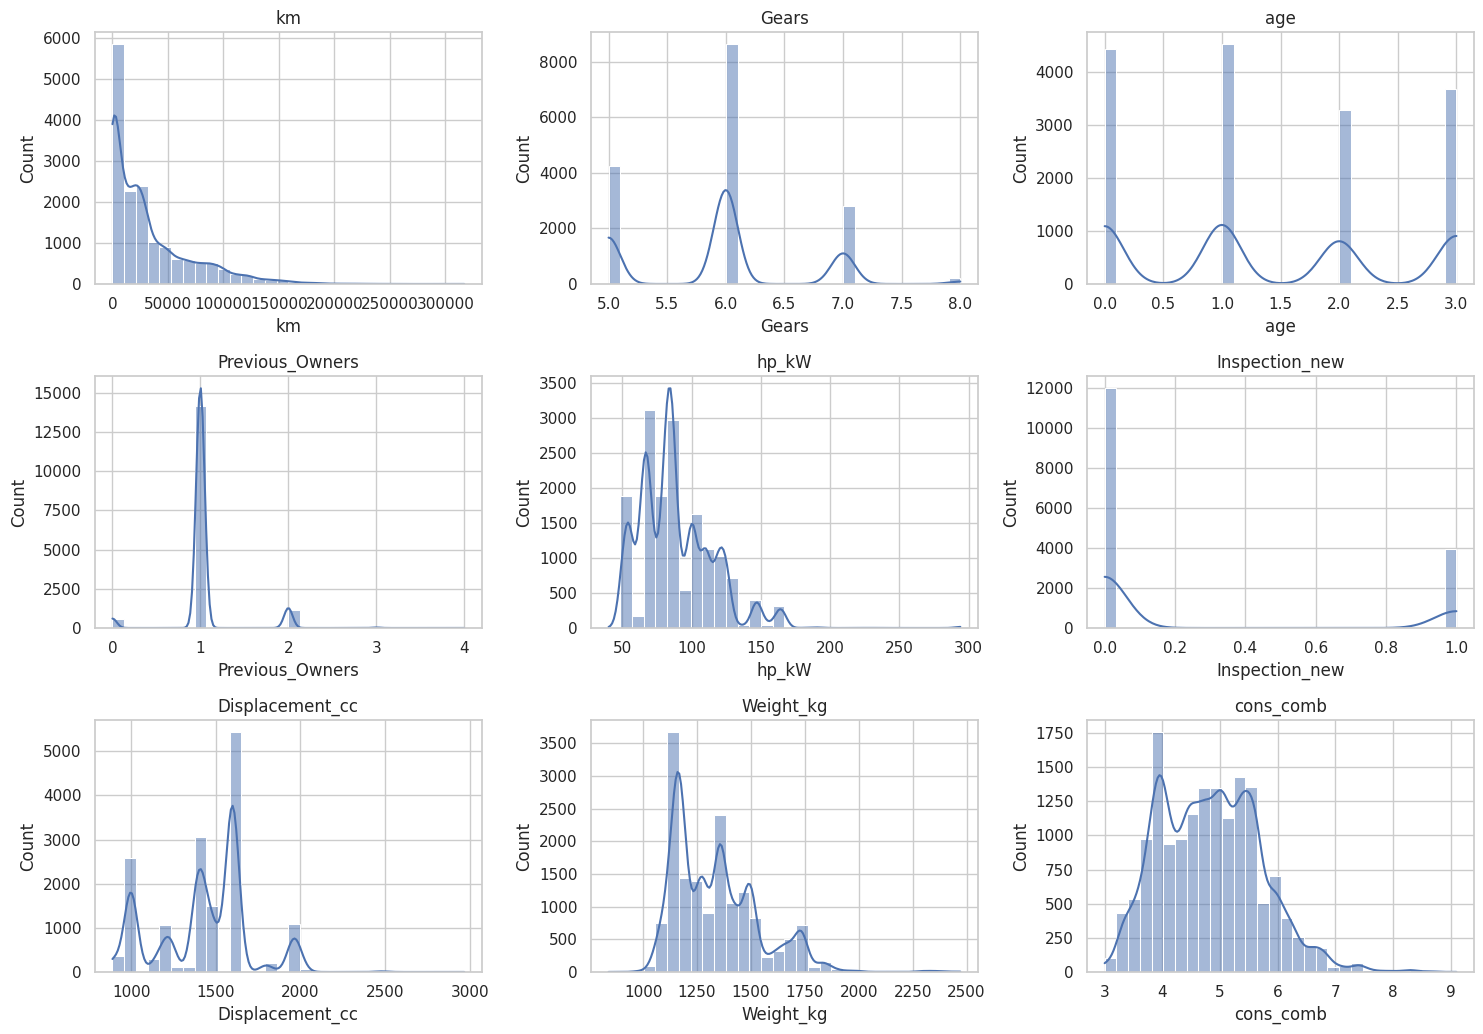

In [244]:
# Identify numerical features and plot histograms

target = target_col
X = df.drop(columns=[target])
y = df[target].astype(float)

# initial automatic separation
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

identifier_candidates = [c for c in X.columns if c.lower().startswith('id') or 'url' in c.lower() or 'link' in c.lower()]
if identifier_candidates:
    print("Dropping identifier-like columns:", identifier_candidates)
    X = X.drop(columns=identifier_candidates)
    num_cols = [c for c in num_cols if c not in identifier_candidates]
    cat_cols = [c for c in cat_cols if c not in identifier_candidates]

print("Target:", target)
print(f"Numerical predictors ({len(num_cols)}):", num_cols)
print(f"Categorical predictors ({len(cat_cols)}):", cat_cols)

num_cols = X.select_dtypes(include=['number']).columns.tolist()
if target in num_cols:
    num_cols.remove(target)

print("Plotting histograms for numerical columns:", num_cols)
n = len(num_cols)
cols = 3
rows = int(np.ceil(n / cols))
plt.figure(figsize=(cols*5, rows*3.5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

#### **2.1.3** <font color =red> [3 marks] </font>
Identify categorical predictors and plot their frequency distributions.

Categorical columns to plot: ['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain']


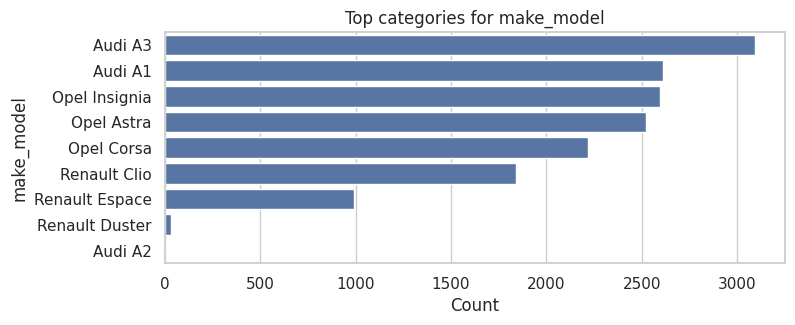

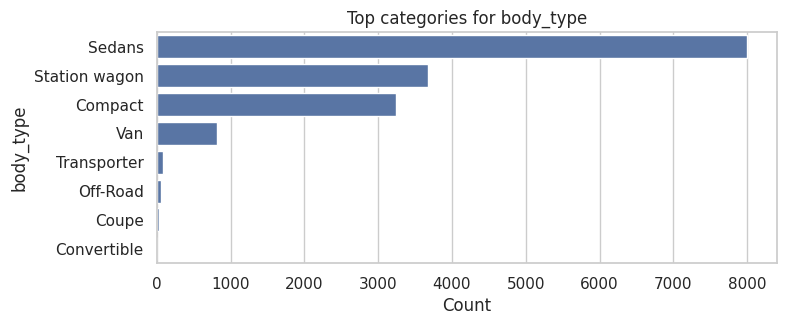

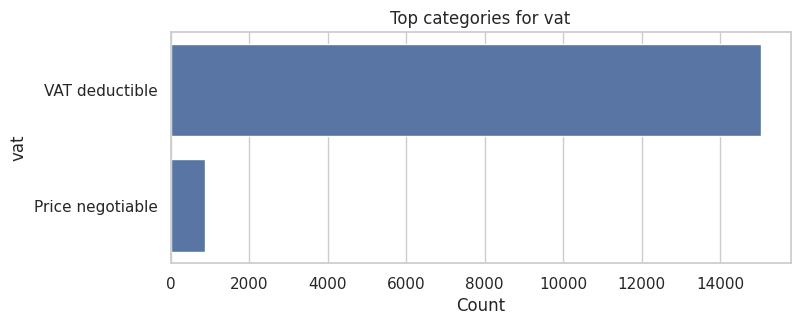

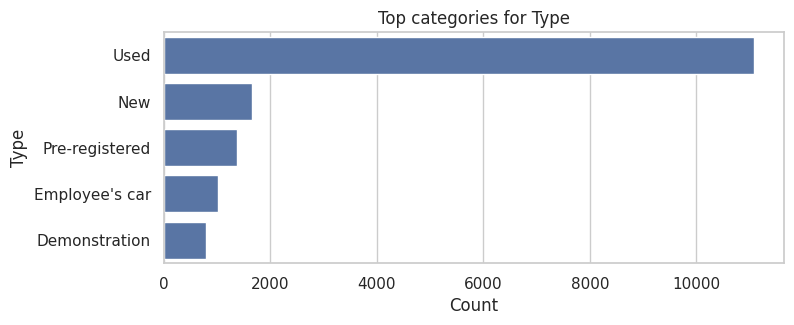

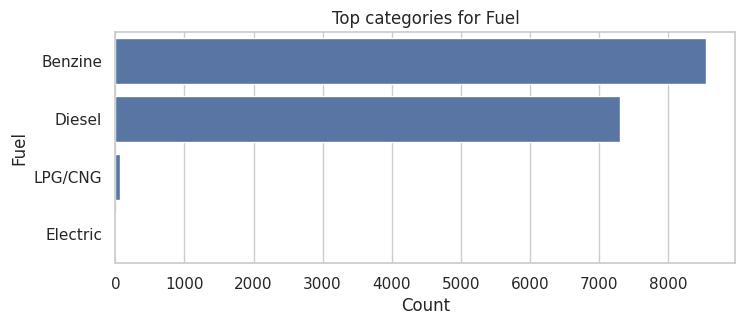

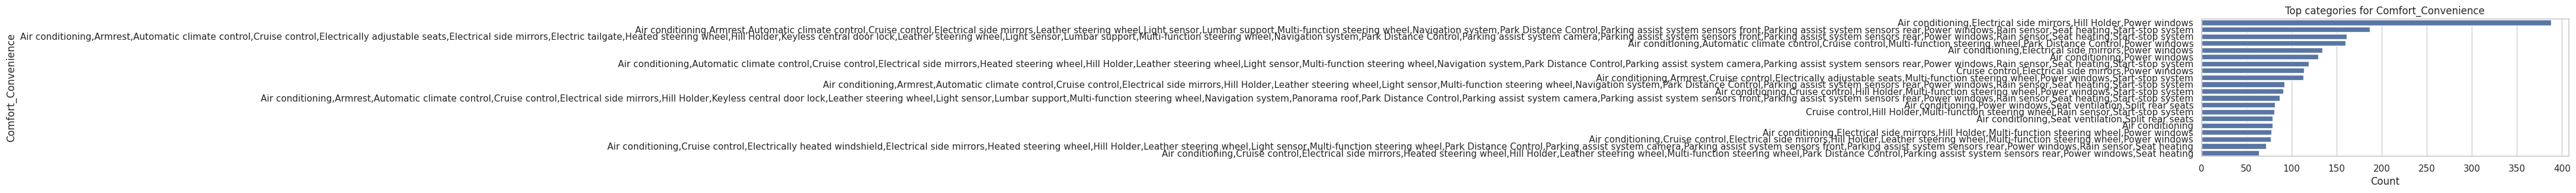

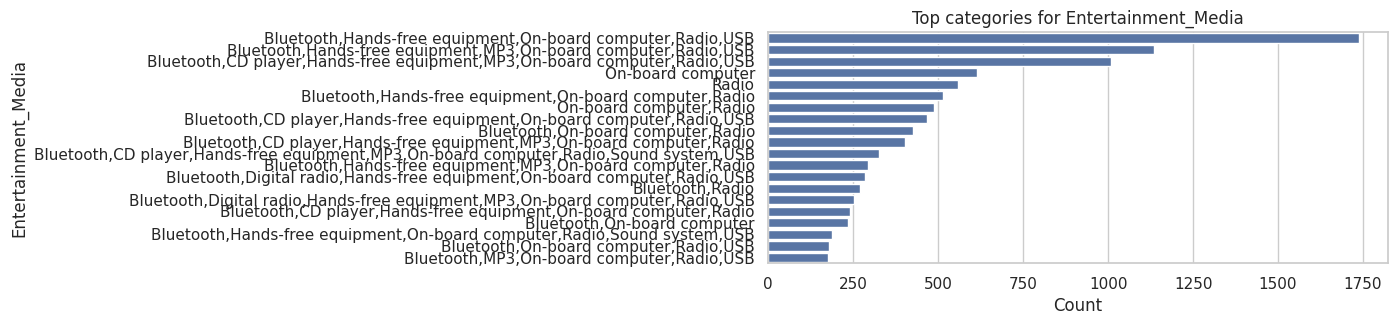

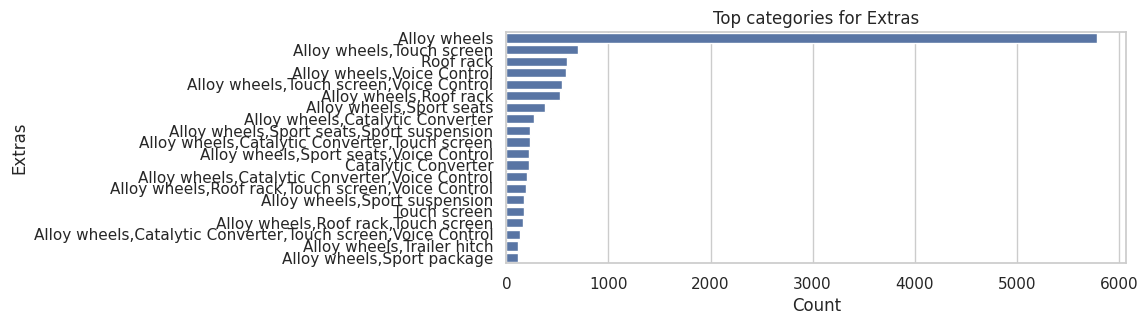

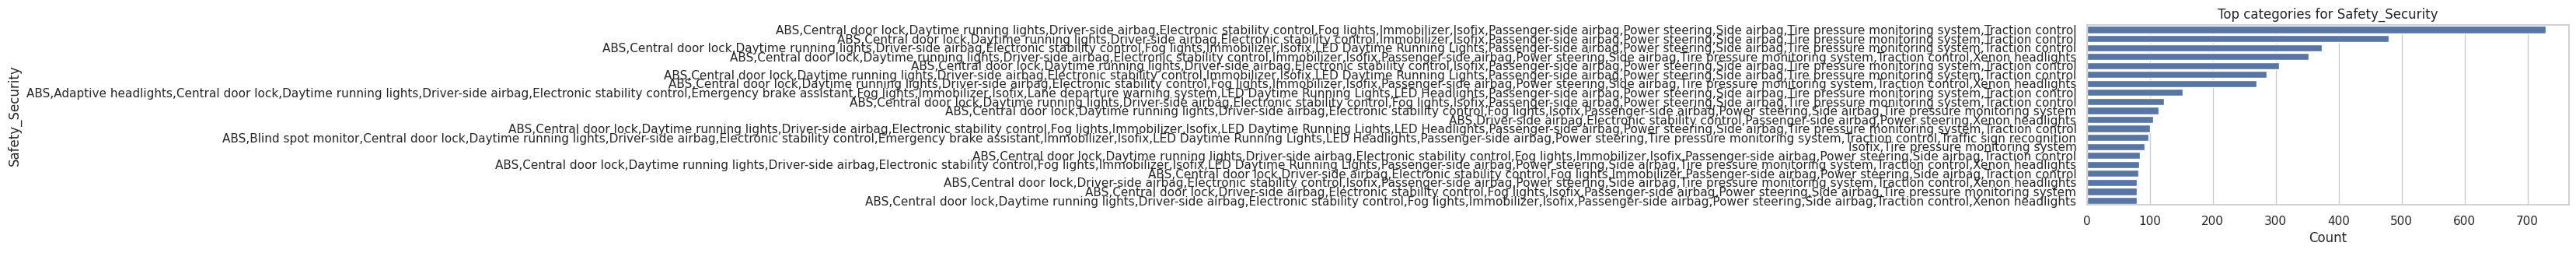

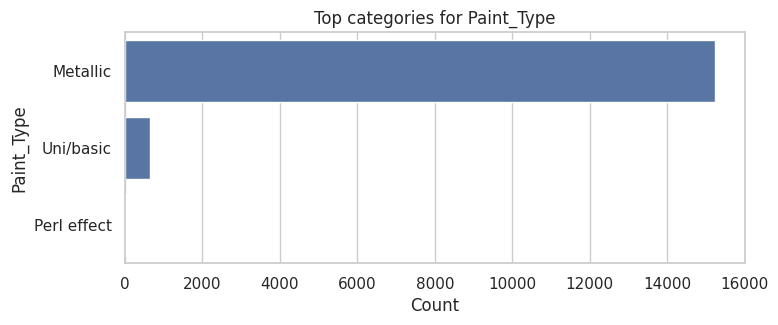

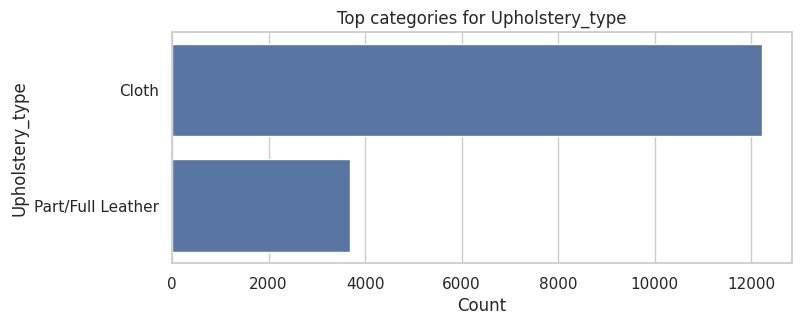

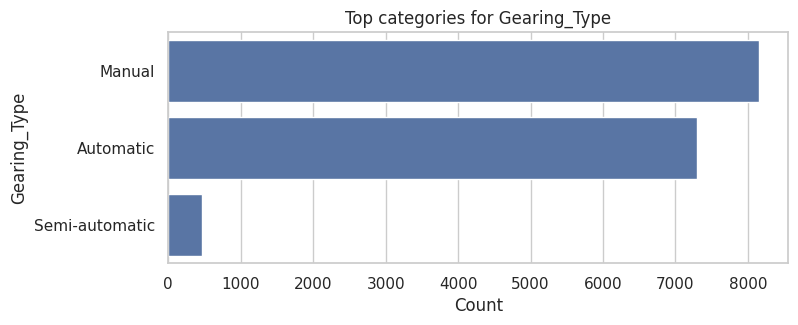

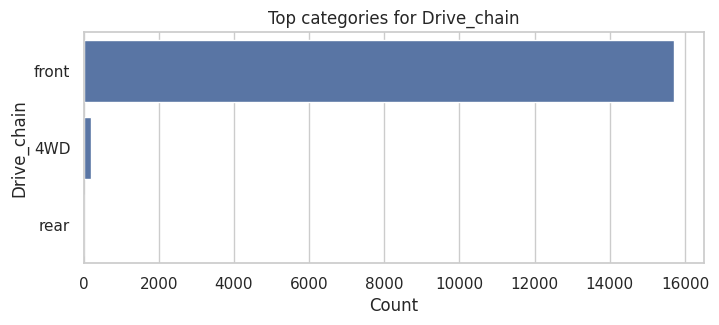

In [245]:
# Identify categorical columns and check their frequency distributions
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Categorical columns to plot:", cat_cols)
for c in cat_cols:
    plt.figure(figsize=(8,3))
    vc = df[c].fillna('missing').value_counts().nlargest(20)
    sns.barplot(x=vc.values, y=vc.index)
    plt.title(f"Top categories for {c}")
    plt.xlabel("Count")
    plt.show()

**Note**: Look carefully at the values stored in columns `["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]`.

Should they be considered categorical? Should they be dropped or handled any other way?

#### **2.1.4** <font color =red> [3 marks] </font>
Fix columns with low frequency values and class imbalances.

Some information regarding values in the `Type` column that may help:
- *'Pre-registered'* cars are ones which have already been registered previously by the seller.
- *'New'* cars are not necessarily new cars, but new-like cars. These might also have multiple owners due to multiple pre-registrations as well.
- *'Employee's car'* are cars used by employees over a short period of time and small distance.
- *'Demonstration'* cars are used for trial purposes and also driven for a short time and distance.

Based on these, you can handle this particular column. For other columns, decide a strategy on your own.

In [246]:
# Fix columns as needed
df["Type"] = df["Type"].fillna("Unknown")

# One-hot encode
df = pd.get_dummies(df, columns=["Type"], prefix="Type")

#### **2.1.5** <font color =red> [3 marks] </font>
Identify target variable and plot the frequency distributions. Apply necessary transformations.

Target variable identified: price

Summary statistics:


count    15915.000000
mean     18024.380584
std       7381.679318
min       4950.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

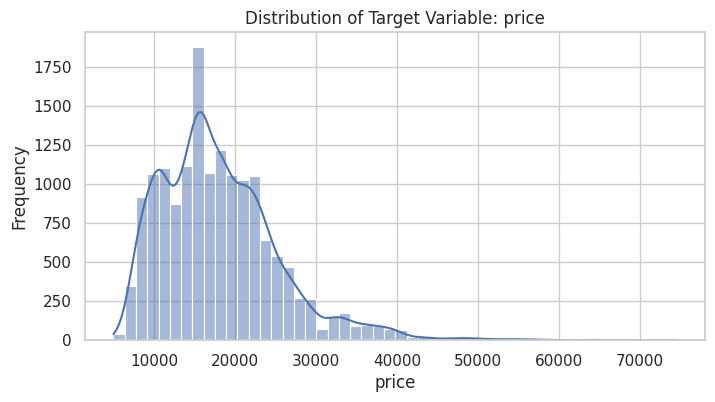

Skewness of price: 1.24


In [247]:
# Identify target variable and plot the frequency distributions. Apply necessary transformations.


target = 'price'

if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found. Available columns: {df.columns.tolist()}")

print(f"Target variable identified: {target}")
print("\nSummary statistics:")
display(df[target].describe())


plt.figure(figsize=(8,4))
sns.histplot(df[target].dropna(), bins=50, kde=True)
plt.title(f"Distribution of Target Variable: {target}")
plt.xlabel(target)
plt.ylabel("Frequency")
plt.show()

# Check skewness
skew_val = df[target].skew()
print(f"Skewness of {target}: {skew_val:.2f}")





**The target variable seems to be skewed. Perform suitable transformation on the target.**

Applying log transformation to reduce skewness...


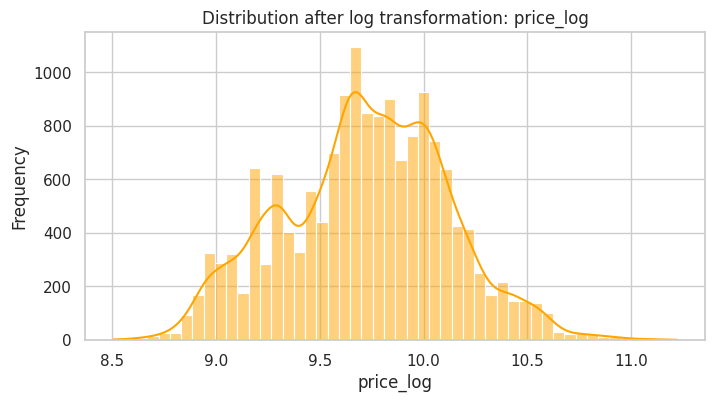

Target variable to use for modeling: price_log
Skewness of price: -0.03


In [248]:
# Transform the target feature
if skew_val > 1:
    print("Applying log transformation to reduce skewness...")
    df[target + "_log"] = np.log1p(df[target])  # log(1 + price) for safety
    transformed_target = target + "_log"
else:
    print("No transformation applied.")
    transformed_target = target

# plot
if transformed_target != target:
    plt.figure(figsize=(8,4))
    sns.histplot(df[transformed_target].dropna(), bins=50, kde=True, color='orange')
    plt.title(f"Distribution after log transformation: {transformed_target}")
    plt.xlabel(transformed_target)
    plt.ylabel("Frequency")
    plt.show()

print(f"Target variable to use for modeling: {transformed_target}")

skew_val_after_transform = df[transformed_target].skew()
print(f"Skewness of {target}: {skew_val_after_transform:.2f}")


### **2.2 Correlation analysis** <font color = red> [6 marks] </font>

#### **2.2.1** <font color =red> [3 marks] </font>
Plot the correlation map between features and target variable.

Using target variable for correlation analysis: price_log

Top 10 features most positively correlated with target:


price_log          1.000000
price              0.962281
hp_kW              0.678024
Gears              0.588194
Weight_kg          0.464597
Displacement_cc    0.254854
cons_comb          0.211097
Inspection_new     0.030927
Previous_Owners   -0.152029
km                -0.419189
Name: price_log, dtype: float64


Top 10 features most negatively correlated with target:


price              0.962281
hp_kW              0.678024
Gears              0.588194
Weight_kg          0.464597
Displacement_cc    0.254854
cons_comb          0.211097
Inspection_new     0.030927
Previous_Owners   -0.152029
km                -0.419189
age               -0.474618
Name: price_log, dtype: float64

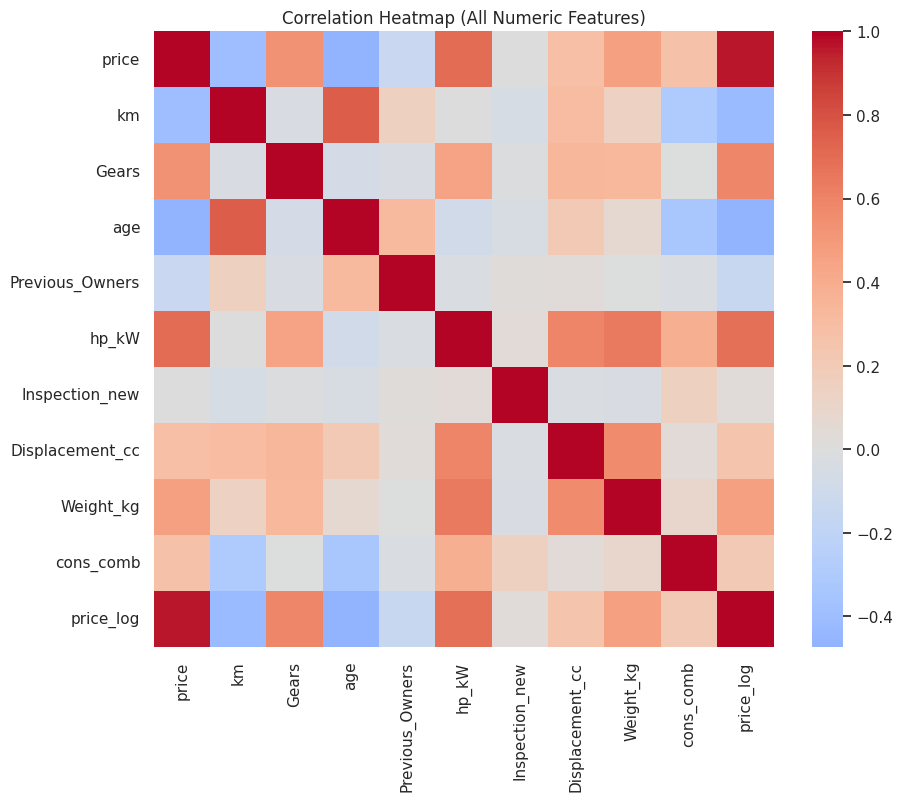

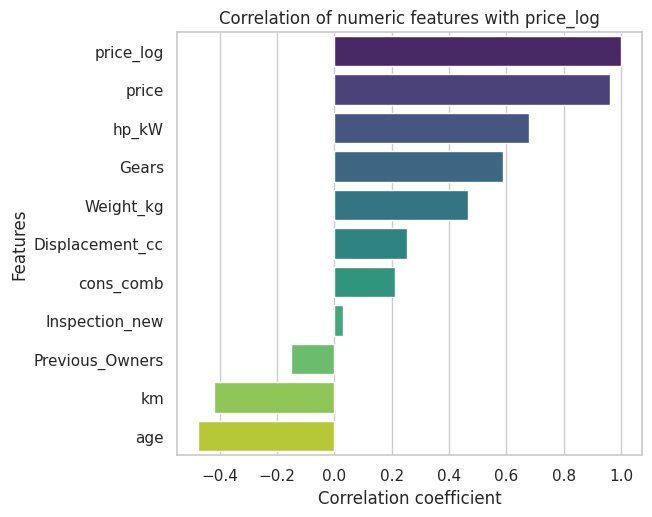

In [249]:
# Visualise correlation

target_var = 'price_log' if 'price_log' in df.columns else 'price'
print(f"Using target variable for correlation analysis: {target_var}")


num_df = df.select_dtypes(include=['number']).copy()


corr_matrix = num_df.corr()


target_corr = corr_matrix[target_var].sort_values(ascending=False)
print("\nTop 10 features most positively correlated with target:")
display(target_corr.head(10))
print("\nTop 10 features most negatively correlated with target:")
display(target_corr.tail(10))


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (All Numeric Features)")
plt.show()


plt.figure(figsize=(6, len(target_corr)/2))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")
plt.title(f"Correlation of numeric features with {target_var}")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.show()



#### **2.2.2** <font color =red> [3 marks] </font>
Analyse correlation between categorical features and target variable.

Using target variable: price_log
Categorical columns: ['make_model', 'body_type', 'vat', 'Fuel', 'Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain', 'Type_Demonstration', "Type_Employee's car", 'Type_New', 'Type_Pre-registered', 'Type_Used']


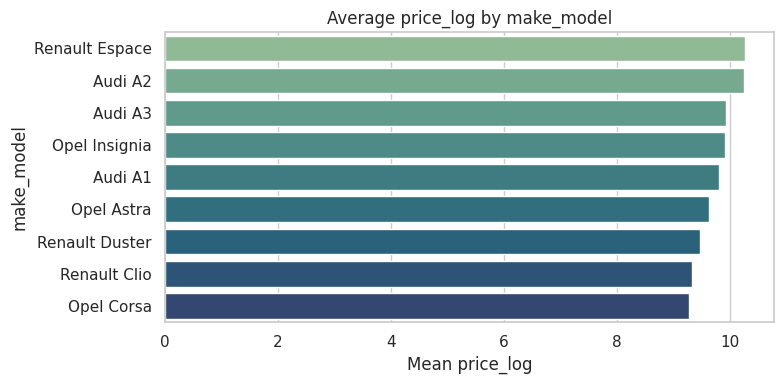


Average price_log by make_model:


make_model
Renault Espace    10.27
Audi A2           10.25
Audi A3            9.93
Opel Insignia      9.91
Audi A1            9.82
Opel Astra         9.63
Renault Duster     9.48
Renault Clio       9.34
Opel Corsa         9.28
Name: price_log, dtype: float64

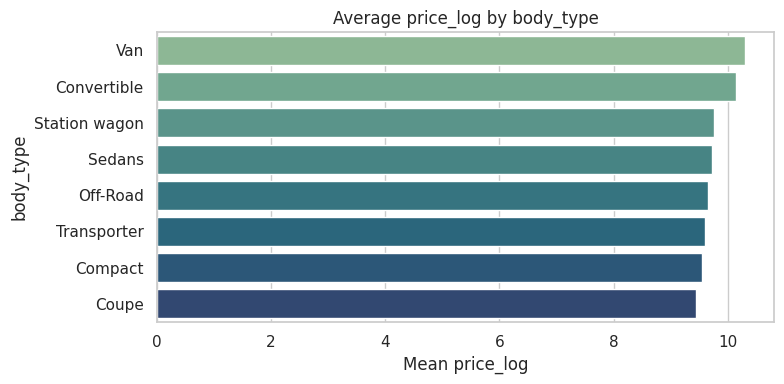


Average price_log by body_type:


body_type
Van              10.29
Convertible      10.14
Station wagon     9.75
Sedans            9.72
Off-Road          9.66
Transporter       9.60
Compact           9.56
Coupe             9.45
Name: price_log, dtype: float64

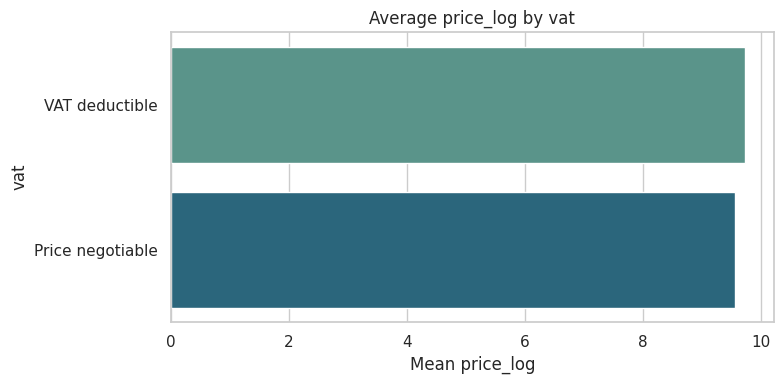


Average price_log by vat:


vat
VAT deductible      9.73
Price negotiable    9.56
Name: price_log, dtype: float64

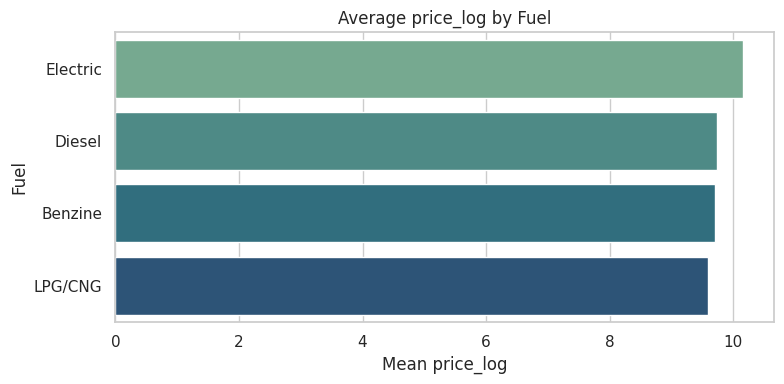


Average price_log by Fuel:


Fuel
Electric    10.15
Diesel       9.73
Benzine      9.71
LPG/CNG      9.60
Name: price_log, dtype: float64


Skipping Comfort_Convenience (too many categories: 6196)

Skipping Entertainment_Media (too many categories: 346)

Skipping Extras (too many categories: 659)

Skipping Safety_Security (too many categories: 4442)


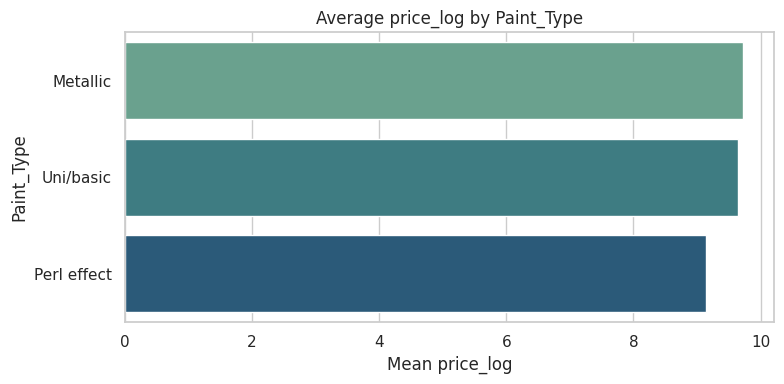


Average price_log by Paint_Type:


Paint_Type
Metallic       9.73
Uni/basic      9.64
Perl effect    9.14
Name: price_log, dtype: float64

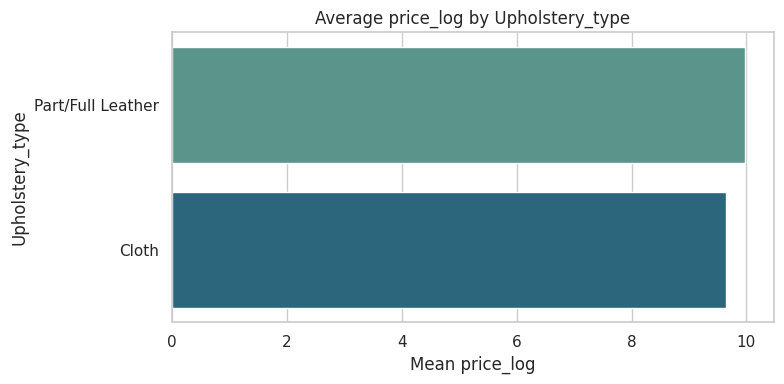


Average price_log by Upholstery_type:


Upholstery_type
Part/Full Leather    9.98
Cloth                9.64
Name: price_log, dtype: float64

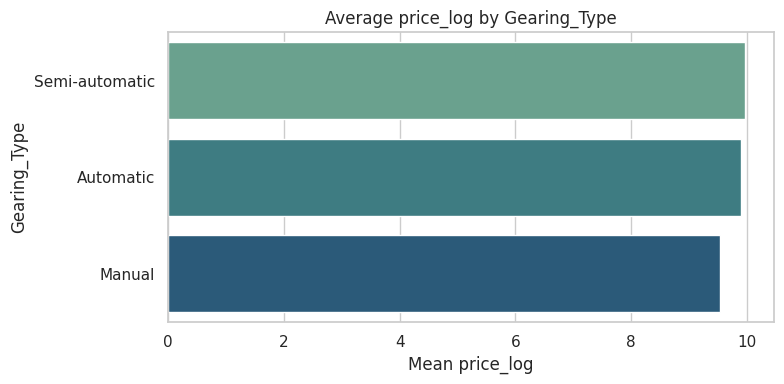


Average price_log by Gearing_Type:


Gearing_Type
Semi-automatic    9.97
Automatic         9.91
Manual            9.54
Name: price_log, dtype: float64

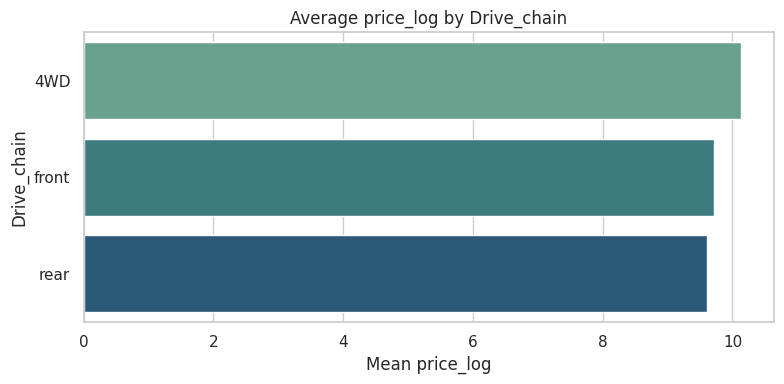


Average price_log by Drive_chain:


Drive_chain
4WD      10.13
front     9.72
rear      9.61
Name: price_log, dtype: float64

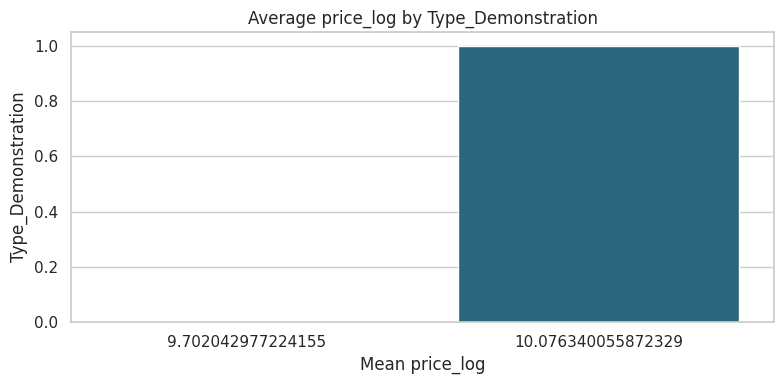


Average price_log by Type_Demonstration:


Type_Demonstration
True     10.08
False     9.70
Name: price_log, dtype: float64

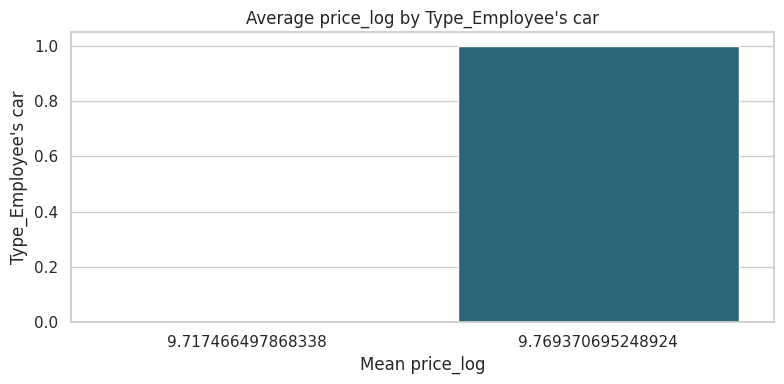


Average price_log by Type_Employee's car:


Type_Employee's car
True     9.77
False    9.72
Name: price_log, dtype: float64

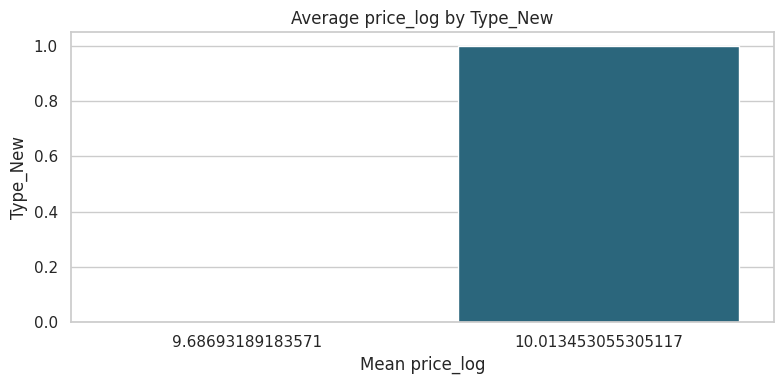


Average price_log by Type_New:


Type_New
True     10.01
False     9.69
Name: price_log, dtype: float64

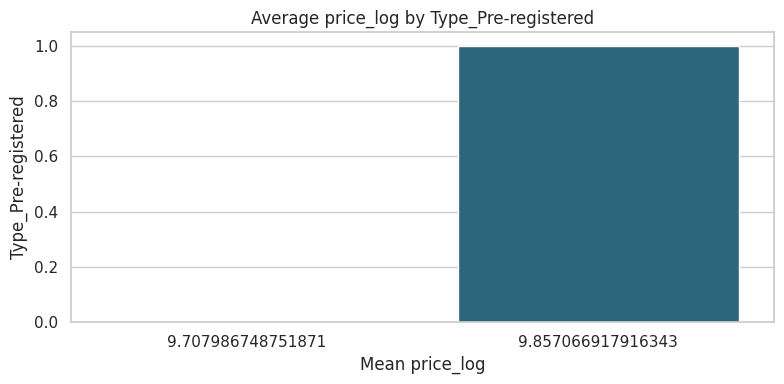


Average price_log by Type_Pre-registered:


Type_Pre-registered
True     9.86
False    9.71
Name: price_log, dtype: float64

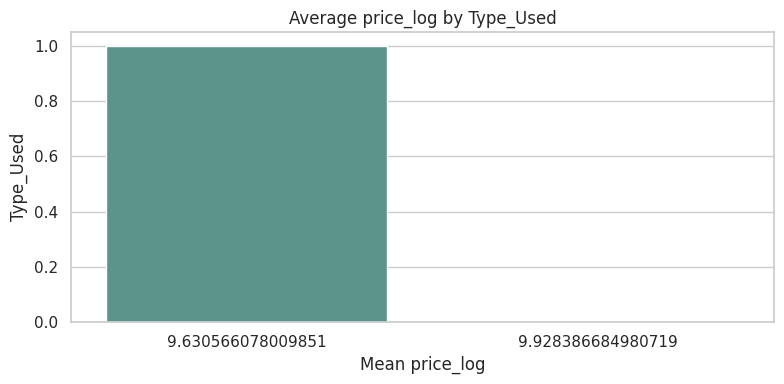


Average price_log by Type_Used:


Type_Used
False    9.93
True     9.63
Name: price_log, dtype: float64

In [250]:
# Compare average values of target for different categories


target_var = 'price_log' if 'price_log' in df.columns else 'price'
print(f"Using target variable: {target_var}")


cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Categorical columns:", cat_cols)


for c in cat_cols:
    if df[c].nunique() > 25:

        print(f"\nSkipping {c} (too many categories: {df[c].nunique()})")
        continue

    plt.figure(figsize=(8, 4))
    grouped = df.groupby(c)[target_var].mean().sort_values(ascending=False)
    sns.barplot(x=grouped.values, y=grouped.index, palette="crest")
    plt.title(f"Average {target_var} by {c}")
    plt.xlabel(f"Mean {target_var}")
    plt.ylabel(c)
    plt.tight_layout()
    plt.show()


    print(f"\nAverage {target_var} by {c}:")
    display(grouped.round(2))


### **2.3 Outlier analysis** <font color = red> [5 marks] </font>

#### **2.3.1** <font color =red> [2 marks] </font>
Identify potential outliers in the data.

Analysing 9 numeric columns for outliers...
Outlier summary (Top 10 columns with highest % of outliers):


Q1       Q3      IQR  Lower_Bound  Upper_Bound  \
Inspection_new      0.0      0.0      0.0         0.00         0.00   
Previous_Owners     1.0      1.0      0.0         1.00         1.00   
km               1920.5  46900.0  44979.5    -65548.75    114369.25   
hp_kW              66.0    103.0     37.0        10.50       158.50   
Gears               5.0      6.0      1.0         3.50         7.50   
cons_comb           4.1      5.4      1.3         2.15         7.35   
Weight_kg        1165.0   1472.0    307.0       704.50      1932.50   
Displacement_cc  1229.0   1598.0    369.0       675.50      2151.50   
age                 0.0      2.0      2.0        -3.00         5.00   

                 Outlier_Count  Outlier_%  
Inspection_new          3932.0      24.71  
Previous_Owners         1757.0      11.04  
km                       689.0       4.33  
hp_kW                    361.0       2.27  
Gears                    225.0       1.41  
cons_comb                125.0       0.79  
Weight_kg                 87.0       0.55  
Displacement_cc           21.0       0.13  
age                        0.0       0.00

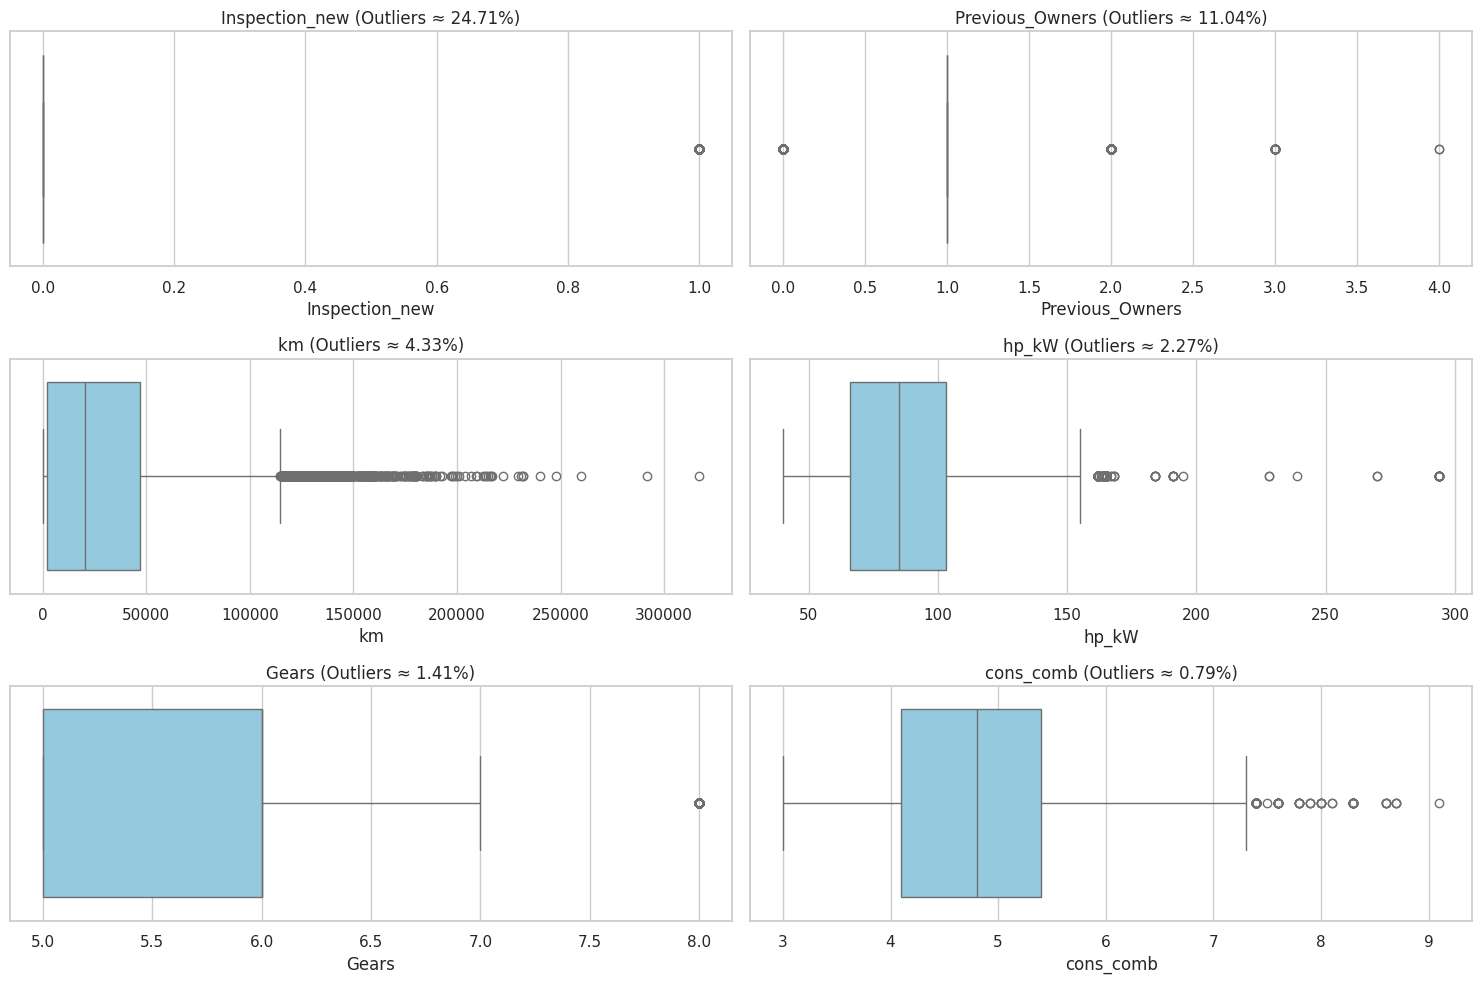

In [251]:
# Outliers present in each column
# Identify potential outliers in each numeric column


num_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'price_log' in num_cols:
    num_cols.remove('price_log')  # exclude target
if 'price' in num_cols:
    num_cols.remove('price')

print(f"Analysing {len(num_cols)} numeric columns for outliers...")


def iqr_outlier_summary(series):
    """Returns lower, upper bounds and count of outliers in a series."""
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((series < lower) | (series > upper)).sum()
    return pd.Series({
        'Q1': q1, 'Q3': q3, 'IQR': iqr,
        'Lower_Bound': lower, 'Upper_Bound': upper,
        'Outlier_Count': outliers,
        'Outlier_%': round(100 * outliers / series.notna().sum(), 2)
    })


outlier_stats = df[num_cols].apply(iqr_outlier_summary).T.sort_values(by='Outlier_%', ascending=False)

print("Outlier summary (Top 10 columns with highest % of outliers):")
display(outlier_stats.head(10))


top_outlier_cols = outlier_stats.head(6).index.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(top_outlier_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"{col} (Outliers ≈ {outlier_stats.loc[col, 'Outlier_%']}%)")
plt.tight_layout()
plt.show()



#### **2.3.2** <font color =red> [3 marks] </font>
Handle the outliers suitably.

Handling outliers for 9 numeric columns...
km: capped 689 outliers to [-65548.75, 114369.25]
Gears: capped 225 outliers to [3.50, 7.50]
Previous_Owners: capped 1757 outliers to [1.00, 1.00]
hp_kW: capped 361 outliers to [10.50, 158.50]
Inspection_new: capped 3932 outliers to [0.00, 0.00]
Displacement_cc: capped 21 outliers to [675.50, 2151.50]
Weight_kg: capped 87 outliers to [704.50, 1932.50]
cons_comb: capped 125 outliers to [2.15, 7.35]


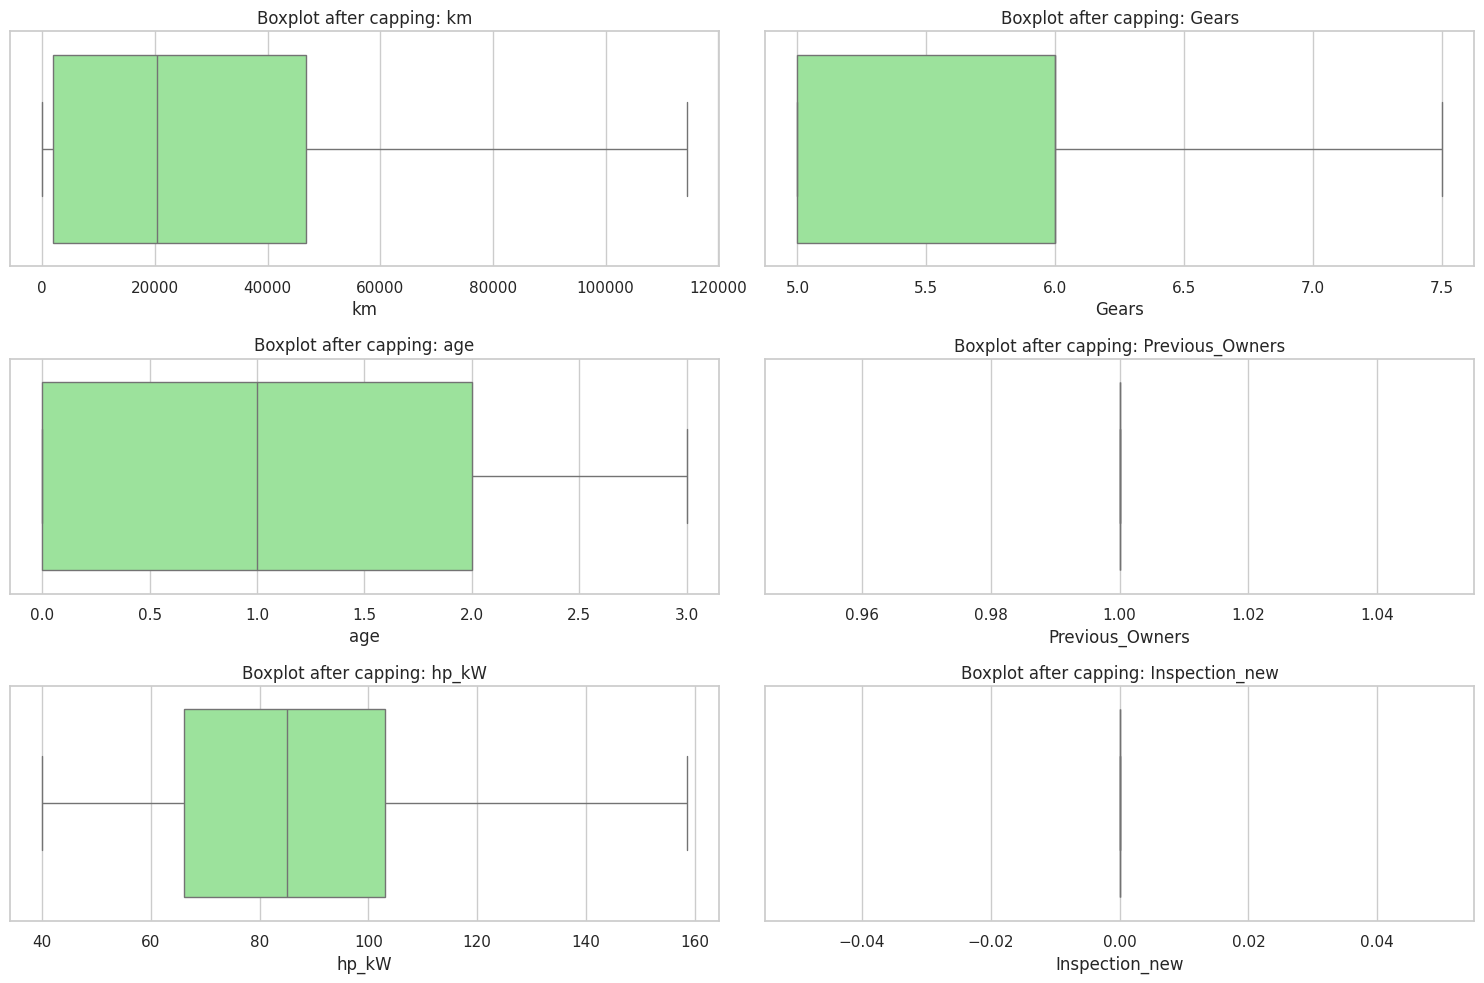

Outlier capping completed. Data is now ready for feature engineering.


In [252]:
# Handle outliers
# Handle outliers suitably using IQR capping method


num_cols = df.select_dtypes(include=['number']).columns.tolist()
for tgt in ['price', 'price_log']:
    if tgt in num_cols:
        num_cols.remove(tgt)

print(f"Handling outliers for {len(num_cols)} numeric columns...")


def iqr_bounds(series):
    """Return lower and upper bounds for outlier capping."""
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper


for col in num_cols:
    if df[col].isnull().all():
        continue
    lower, upper = iqr_bounds(df[col])
    before = df[col].copy()
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    capped = (before != df[col]).sum()
    if capped > 0:
        print(f"{col}: capped {capped} outliers to [{lower:.2f}, {upper:.2f}]")


plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:6], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot after capping: {col}")
plt.tight_layout()
plt.show()

print("Outlier capping completed. Data is now ready for feature engineering.")


### **2.4 Feature Engineering** <font color = red> [11 marks] </font>

#### **2.4.1**
Fix any redundant columns and create new ones if needed.

In [253]:
# Fix/create columns as needed

# Fix any redundant columns and create new ones if needed

print("Initial dataset shape:", df.shape)

redundant_cols = [c for c in df.columns
                  if any(x in c.lower() for x in ['id', 'url', 'link', 'unnamed', 'vin', 'serial'])]


duplicate_cols = [c for c in df.columns if df.columns.duplicated().any()]
redundant_cols += duplicate_cols


if redundant_cols:
    print("Dropping redundant columns:", redundant_cols)
    df = df.drop(columns=redundant_cols, errors='ignore')
else:
    print("No redundant columns found.")


if 'Registration_Year' in df.columns:
    current_year = 2025
    df['Car_Age'] = current_year - df['Registration_Year']
    print("Created new feature: Car_Age")


if set(['Power', 'Weight']).issubset(df.columns):
    df['Power_to_Weight'] = df['Power'] / df['Weight']
    print("Created new feature: Power_to_Weight")


spec_cols = [c for c in df.columns if any(x in c.lower() for x in
              ['comfort', 'entertain', 'extra', 'safety', 'media'])]

for c in spec_cols:
    df[c + '_count'] = df[c].fillna('').astype(str).apply(lambda s: 0 if s.strip() == '' else len(s.split(',')))
if spec_cols:
    print("Created specification count features for:", spec_cols)


zero_var_cols = [c for c in df.columns if df[c].nunique(dropna=False) <= 1]
if zero_var_cols:
    print("Dropping zero-variance columns:", zero_var_cols)
    df = df.drop(columns=zero_var_cols, errors='ignore')

print("\nFinal dataset shape after feature engineering:", df.shape)
print("Sample columns:", df.columns[:15].tolist())

df.head()


Initial dataset shape: (15915, 28)
No redundant columns found.
Created specification count features for: ['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']
Dropping zero-variance columns: ['Previous_Owners', 'Inspection_new']

Final dataset shape after feature engineering: (15915, 30)
Sample columns: ['make_model', 'body_type', 'price', 'vat', 'km', 'Fuel', 'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security', 'age', 'hp_kW', 'Paint_Type', 'Upholstery_type']


make_model body_type  price               vat       km     Fuel  Gears  \
0    Audi A1    Sedans  15770    VAT deductible  56013.0   Diesel    7.0   
1    Audi A1    Sedans  14500  Price negotiable  80000.0  Benzine    7.0   
2    Audi A1    Sedans  14640    VAT deductible  83450.0   Diesel    7.0   
3    Audi A1    Sedans  14500    VAT deductible  73000.0   Diesel    6.0   
4    Audi A1    Sedans  16790    VAT deductible  16200.0   Diesel    7.0   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  ... Type_Demonstration  \
0     Alloy wheels,Catalytic Converter,Voice Control  ...              False   
1  Alloy wheels,Sport seats,Sport suspension,Voic...  ...              False   
2                         Alloy wheels,Voice Control  ...              False   
3             Alloy wheels,Sport seats,Voice Control  ...              False   
4  Alloy wheels,Sport package,Sport suspension,Vo...  ...              False   

   Type_Employee's car  Type_New Type_Pre-registered Type_Used price_log  \
0                False     False               False      True  9.665928   
1                False     False               False      True  9.581973   
2                False     False               False      True  9.591581   
3                False     False               False      True  9.581973   
4                False     False               False      True  9.728598   

   Comfort_Convenience_count  Entertainment_Media_count Extras_count  \
0                         16                          4            3   
1                          9                          5            4   
2                         13                          2            2   
3                         16                          8            3   
4                         13                          7            4   

   Safety_Security_count  
0                     14  
1                     15  
2                     12  
3                     14  
4                     13  

[5 rows x 30 columns]

#### **2.4.2** <font color =red> [4 marks] </font>
Analysis and feature engineering on `['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']`.

These columns contains lists of features present. Decide on how to include these features in the predictors.

In [254]:
# Check unique values in each feature spec column



spec_cols = ['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']
spec_cols = [c for c in spec_cols if c in df.columns]
print("Specification columns found:", spec_cols)


for c in spec_cols:
    print(f"\n--- {c} ---")
    unique_entries = df[c].dropna().unique()
    print(f"Number of unique combinations: {len(unique_entries)}")
    print("Sample values:")
    print(df[c].dropna().head(5).tolist())


for c in spec_cols:
    df[c] = df[c].fillna("").astype(str).str.lower().str.strip()


for c in spec_cols:
    df[c + "_count"] = df[c].apply(lambda s: len([x for x in s.split(',') if x.strip() != '']))
    print(f"Created feature: {c}_count")


from collections import Counter

def extract_top_features(series, top_n=10):
    all_features = []
    for s in series.dropna():
        all_features.extend([x.strip() for x in s.split(',') if x.strip()])
    common = [f for f, _ in Counter(all_features).most_common(top_n)]
    return common


for c in spec_cols:
    top_feats = extract_top_features(df[c], top_n=10)
    print(f"Top features in {c}: {top_feats}")
    for feat in top_feats:
        feat_col = f"{c}_{feat.replace(' ', '_')}"
        df[feat_col] = df[c].apply(lambda s: int(feat in s))
    print(f"Added {len(top_feats)} binary columns for {c}")


df = df.drop(columns=spec_cols, errors='ignore')

print("\nSpecification-based feature engineering completed.")
print("Current dataset shape:", df.shape)
print("New spec-derived columns added (sample):")
display([col for col in df.columns if any(x in col for x in ['Comfort_Convenience_', 'Entertainment_Media_', 'Extras_', 'Safety_Security_'])][:15])

df.head()


Specification columns found: ['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']

--- Comfort_Convenience ---
Number of unique combinations: 6196
Sample values:
['Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system', 'Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,Start-stop system,Tinted windows', 'Air conditioning,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Seat heating,Start-stop system', 'Air suspension,Armrest,Auxiliary heating,Electrical 

['Comfort_Convenience_count',
 'Entertainment_Media_count',
 'Extras_count',
 'Safety_Security_count',
 'Comfort_Convenience_air_conditioning',
 'Comfort_Convenience_power_windows',
 'Comfort_Convenience_electrical_side_mirrors',
 'Comfort_Convenience_multi-function_steering_wheel',
 'Comfort_Convenience_cruise_control',
 'Comfort_Convenience_park_distance_control',
 'Comfort_Convenience_parking_assist_system_sensors_rear',
 'Comfort_Convenience_leather_steering_wheel',
 'Comfort_Convenience_start-stop_system',
 'Comfort_Convenience_automatic_climate_control',
 'Entertainment_Media_on-board_computer']

make_model body_type  price               vat       km     Fuel  Gears  age  \
0    Audi A1    Sedans  15770    VAT deductible  56013.0   Diesel    7.0  3.0   
1    Audi A1    Sedans  14500  Price negotiable  80000.0  Benzine    7.0  2.0   
2    Audi A1    Sedans  14640    VAT deductible  83450.0   Diesel    7.0  3.0   
3    Audi A1    Sedans  14500    VAT deductible  73000.0   Diesel    6.0  3.0   
4    Audi A1    Sedans  16790    VAT deductible  16200.0   Diesel    7.0  3.0   

   hp_kW Paint_Type  ... Safety_Security_abs  \
0   66.0   Metallic  ...                   1   
1  141.0   Metallic  ...                   1   
2   85.0   Metallic  ...                   1   
3   66.0   Metallic  ...                   1   
4   66.0   Metallic  ...                   1   

  Safety_Security_driver-side_airbag  Safety_Security_power_steering  \
0                                  1                               1   
1                                  1                               1   
2                                  1                               1   
3                                  1                               1   
4                                  1                               1   

   Safety_Security_passenger-side_airbag  \
0                                      1   
1                                      1   
2                                      1   
3                                      1   
4                                      1   

  Safety_Security_electronic_stability_control  Safety_Security_side_airbag  \
0                                            1                            1   
1                                            1                            1   
2                                            1                            1   
3                                            1                            1   
4                                            1                            1   

   Safety_Security_central_door_lock  Safety_Security_isofix  \
0                                  1                       1   
1                                  1                       1   
2                                  1                       1   
3                                  1                       1   
4                                  1                       1   

   Safety_Security_traction_control  \
0                                 1   
1                                 1   
2                                 1   
3                                 0   
4                                 1   

   Safety_Security_tire_pressure_monitoring_system  
0                                                1  
1                                                1  
2                                                1  
3                                                1  
4                                                1  

[5 rows x 66 columns]

Out of these features, we will check the ones which are present in most of the cars or are absent from most of the cars. These kinds of features can be removed as they just increase the dimensionality without explaining the variance.

In [255]:
# Drop features from df

spec_feature_cols = [c for c in df.columns if any(x in c for x in
                        ['Comfort_Convenience_', 'Entertainment_Media_', 'Extras_', 'Safety_Security_'])]

print(f"Number of binary specification features before filtering: {len(spec_feature_cols)}")


low_var_summary = df[spec_feature_cols].mean().sort_values()
low_var_df = pd.DataFrame({
    'Feature': low_var_summary.index,
    'Presence_%': (low_var_summary.values * 100).round(2)
})

print("\nTop 10 least common features:")
display(low_var_df.head(10))

print("\nTop 10 most common features:")
display(low_var_df.tail(10))


LOW_THRESHOLD = 5.0
HIGH_THRESHOLD = 95.0

remove_features = low_var_df[
    (low_var_df['Presence_%'] < LOW_THRESHOLD) |
    (low_var_df['Presence_%'] > HIGH_THRESHOLD)
]['Feature'].tolist()

print(f"\nDropping {len(remove_features)} low-variance spec features.")
df = df.drop(columns=remove_features, errors='ignore')


remaining_spec_features = [c for c in df.columns if any(x in c for x in
                            ['Comfort_Convenience_', 'Entertainment_Media_', 'Extras_', 'Safety_Security_'])]

print(f"Remaining spec feature columns: {len(remaining_spec_features)}")
display(remaining_spec_features[:15])



Number of binary specification features before filtering: 44

Top 10 least common features:


Feature  Presence_%
0     Entertainment_Media_television        0.25
1               Extras_shift_paddles        3.19
2               Extras_trailer_hitch        4.13
3               Extras_sport_package        7.55
4            Extras_sport_suspension       10.19
5  Entertainment_Media_digital_radio       14.08
6   Entertainment_Media_sound_system       14.10
7         Extras_catalytic_converter       14.21
8                   Extras_roof_rack       19.18
9                 Extras_sport_seats       19.50


Top 10 most common features:


Feature  Presence_%
34        Safety_Security_power_steering       91.04
35     Comfort_Convenience_power_windows       92.72
36    Safety_Security_driver-side_airbag       93.00
37                   Safety_Security_abs       94.39
38  Comfort_Convenience_air_conditioning       94.85
39           Safety_Security_side_airbag       96.23
40                          Extras_count      224.12
41             Entertainment_Media_count      466.85
42             Comfort_Convenience_count     1219.37
43                 Safety_Security_count     1278.63


Dropping 8 low-variance spec features.
Remaining spec feature columns: 36


['Comfort_Convenience_air_conditioning',
 'Comfort_Convenience_power_windows',
 'Comfort_Convenience_electrical_side_mirrors',
 'Comfort_Convenience_multi-function_steering_wheel',
 'Comfort_Convenience_cruise_control',
 'Comfort_Convenience_park_distance_control',
 'Comfort_Convenience_parking_assist_system_sensors_rear',
 'Comfort_Convenience_leather_steering_wheel',
 'Comfort_Convenience_start-stop_system',
 'Comfort_Convenience_automatic_climate_control',
 'Entertainment_Media_on-board_computer',
 'Entertainment_Media_radio',
 'Entertainment_Media_bluetooth',
 'Entertainment_Media_hands-free_equipment',
 'Entertainment_Media_usb']

#### **2.4.3** <font color =red> [3 marks] </font>
Perform feature encoding.

In [256]:
# Encode features
# Perform feature encoding for categorical features (fixed for newer scikit-learn versions)


cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()


for tgt in ['price', 'price_log']:
    if tgt in num_cols:
        num_cols.remove(tgt)

print(f"Categorical columns to encode: {len(cat_cols)}")
print(f"Numeric columns (excluding target): {len(num_cols)}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#
ohe_params = dict(drop='first', handle_unknown='ignore')
if sklearn.__version__ >= '1.4':
    ohe_params['sparse_output'] = False
else:
    ohe_params['sparse'] = False

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(**ohe_params))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

print("Preprocessing pipeline created successfully.")


target_var = 'price_log' if 'price_log' in df.columns else 'price'

X = df.drop(columns=[target_var])
y = df[target_var].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train/Test split completed:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)





Categorical columns to encode: 13
Numeric columns (excluding target): 43
Preprocessing pipeline created successfully.
Train/Test split completed:
X_train: (12732, 57) X_test: (3183, 57)
y_train: (12732,) y_test: (3183,)


#### **2.4.4** <font color =red> [2 marks] </font>
Split the data into training and testing sets.

Using target variable: price_log
Shape of feature matrix (X): (15915, 57)
Shape of target vector (y): (15915,)

Data successfully split:
X_train: (12732, 57), X_test: (3183, 57)
y_train: (12732,), y_test: (3183,)


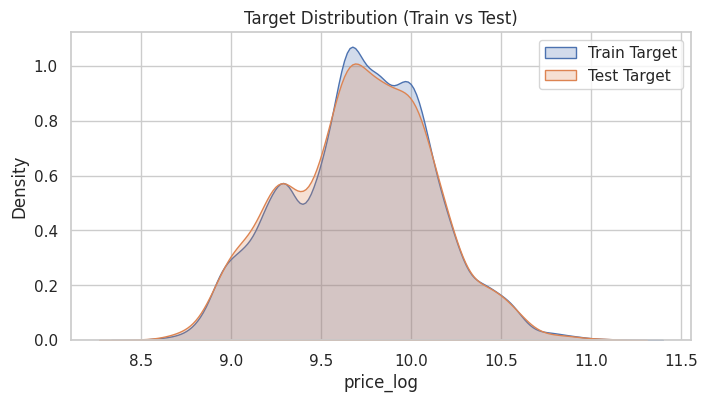

In [257]:
# Split data

target_var = 'price_log' if 'price_log' in df.columns else 'price'
print(f"Using target variable: {target_var}")


X = df.drop(columns=[target_var])
y = df[target_var].values

print("Shape of feature matrix (X):", X.shape)
print("Shape of target vector (y):", y.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=None         #
)

print("\nData successfully split:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


plt.figure(figsize=(8,4))
sns.kdeplot(y_train, label='Train Target', shade=True)
sns.kdeplot(y_test, label='Test Target', shade=True)
plt.title("Target Distribution (Train vs Test)")
plt.xlabel(target_var)
plt.legend()
plt.show()


#### **2.4.5** <font color =red> [2 marks] </font>
Scale the features.

In [258]:
# Scale features


from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import sklearn


cat_cols = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()

print(f"Numeric columns: {len(num_cols)}")
print(f"Categorical columns: {len(cat_cols)}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ohe_params = dict(drop='first', handle_unknown='ignore')
if sklearn.__version__ >= '1.4':
    ohe_params['sparse_output'] = False
else:
    ohe_params['sparse'] = False

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(**ohe_params))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])


X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("Feature scaling completed successfully.")
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled test data shape:", X_test_scaled.shape)

try:
    feature_names = []
    feature_names.extend(num_cols)
    if cat_cols:
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        feature_names.extend(ohe.get_feature_names_out(cat_cols))
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
    display(X_train_scaled_df.head())
except Exception as e:
    print("Feature name extraction skipped due to:", e)


Numeric columns: 44
Categorical columns: 13
Feature scaling completed successfully.
Scaled training data shape: (12732, 74)
Scaled test data shape: (3183, 74)


price        km     Gears      age     hp_kW  Displacement_cc  \
0 -1.090198 -0.741835 -1.358451 -1.24355 -1.278689        -1.934471   
1  0.533777 -0.916383 -1.358451 -1.24355 -0.134375        -1.566735   
2 -1.171254  1.223555 -1.358451  1.43032 -0.568425        -0.113993   
3 -1.252446  0.535184 -1.358451  0.53903 -1.475984        -0.729315   
4  2.792268 -0.928354  0.099511 -0.35226  2.765867         1.342389   

   Weight_kg  cons_comb  Comfort_Convenience_air_conditioning  \
0  -1.126511   0.200346                              0.229302   
1  -1.038933  -0.032471                              0.229302   
2   0.449903  -0.381697                              0.229302   
3  -0.899837   0.549571                              0.229302   
4   2.041773   2.295699                              0.229302   

   Comfort_Convenience_power_windows  ...  Upholstery_type_Part/Full Leather  \
0                            0.27232  ...                                0.0   
1                            0.27232  ...                                0.0   
2                            0.27232  ...                                0.0   
3                            0.27232  ...                                0.0   
4                            0.27232  ...                                1.0   

   Gearing_Type_Manual  Gearing_Type_Semi-automatic  Drive_chain_front  \
0                  1.0                          0.0                1.0   
1                  1.0                          0.0                1.0   
2                  1.0                          0.0                1.0   
3                  1.0                          0.0                1.0   
4                  0.0                          0.0                1.0   

   Drive_chain_rear  Type_Demonstration_True  Type_Employee's car_True  \
0               0.0                      0.0                       0.0   
1               0.0                      0.0                       0.0   
2               0.0                      0.0                       0.0   
3               0.0                      0.0                       0.0   
4               0.0                      0.0                       0.0   

   Type_New_True  Type_Pre-registered_True  Type_Used_True  
0            0.0                       0.0             1.0  
1            0.0                       1.0             0.0  
2            0.0                       0.0             1.0  
3            0.0                       0.0             1.0  
4            0.0                       1.0             0.0  

[5 rows x 74 columns]

## **3 Linear Regression Models** <font color =red> [35 marks] </font>


### **3.1 Baseline Linear Regression Model** <font color =red> [10 marks] </font>

#### **3.1.1** <font color =red> [5 marks] </font>
Build and fit a basic linear regression model. Perform evaluation using suitable metrics.

Linear Regression model trained successfully.

Train Set Evaluation Metrics:
RMSE: 0.0647
MAE : 0.0470
R²  : 0.9735

Test Set Evaluation Metrics:
RMSE: 0.0629
MAE : 0.0462
R²  : 0.9752


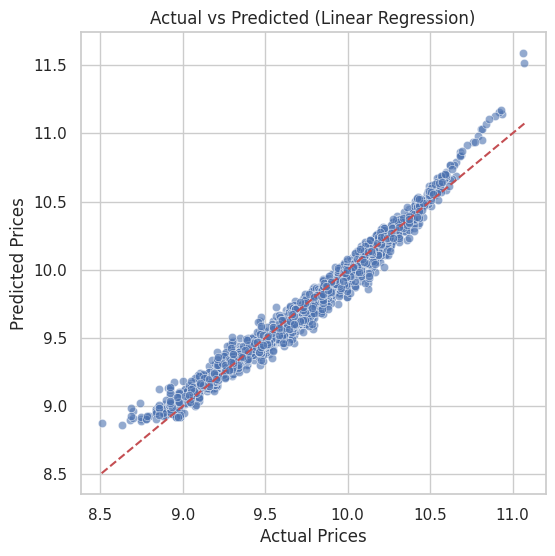

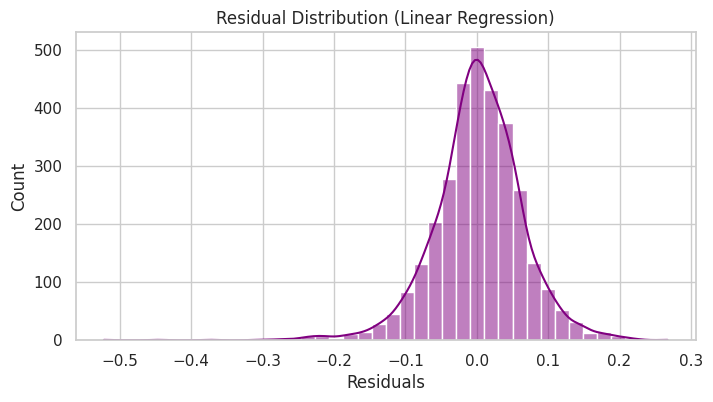

In [259]:
# Initialise and train model


lin_reg = LinearRegression()


lin_reg.fit(X_train_scaled, y_train)
print("Linear Regression model trained successfully.")


y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)


def regression_metrics(y_true, y_pred, dataset_name="Test"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{dataset_name} Set Evaluation Metrics:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")
    return rmse, mae, r2


train_results = regression_metrics(y_train, y_train_pred, "Train")
test_results = regression_metrics(y_test, y_test_pred, "Test")


plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

residuals = y_test - y_test_pred
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=40, kde=True, color='purple')
plt.title("Residual Distribution (Linear Regression)")
plt.xlabel("Residuals")
plt.show()


Linear Regression Model Performance Summary
Training Set:
  RMSE = 0.0647
  MAE  = 0.0470
  R²   = 0.9735
--------------------------------------------------
Test Set:
  RMSE = 0.0629
  MAE  = 0.0462
  R²   = 0.9752


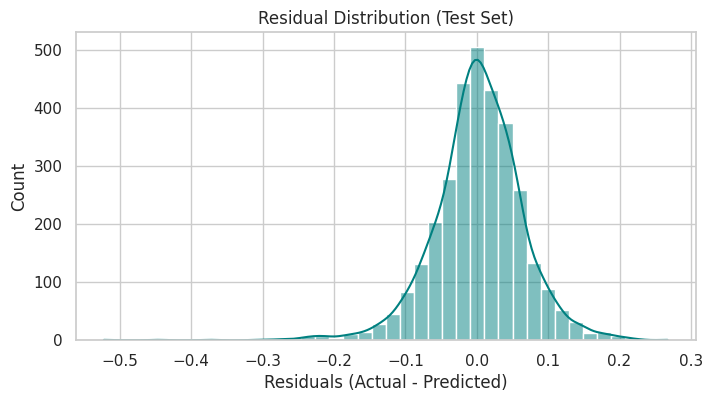

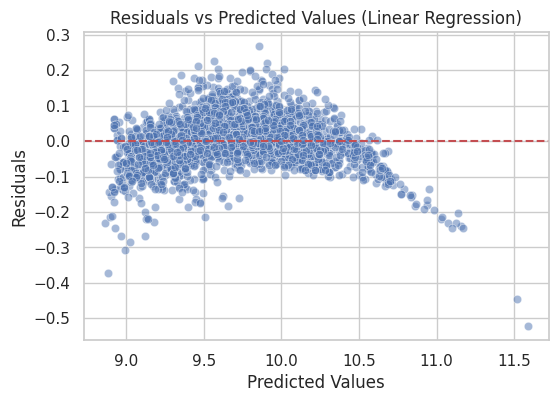

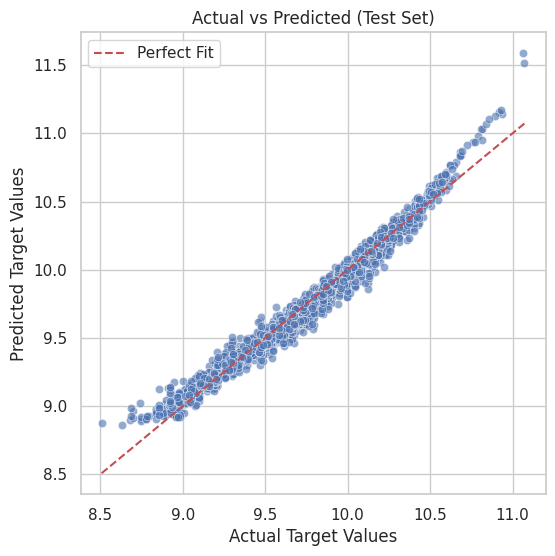

In [260]:
# Evaluate the model's performance


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae  = mean_absolute_error(y_train, y_train_pred)
train_r2   = r2_score(y_train, y_train_pred)

test_rmse  = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae   = mean_absolute_error(y_test, y_test_pred)
test_r2    = r2_score(y_test, y_test_pred)


print("Linear Regression Model Performance Summary")
print("="*50)
print(f"Training Set:\n  RMSE = {train_rmse:.4f}\n  MAE  = {train_mae:.4f}\n  R²   = {train_r2:.4f}")
print("-"*50)
print(f"Test Set:\n  RMSE = {test_rmse:.4f}\n  MAE  = {test_mae:.4f}\n  R²   = {test_r2:.4f}")
print("="*50)


residuals = y_test - y_test_pred

plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=40, kde=True, color='teal')
plt.title("Residual Distribution (Test Set)")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()


plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values (Linear Regression)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.show()



#### **3.1.2** <font color =red> [5 marks] </font>
Analyse residuals and check other assumptions of linear regression.

Check for linearity by analysing residuals vs predicted values

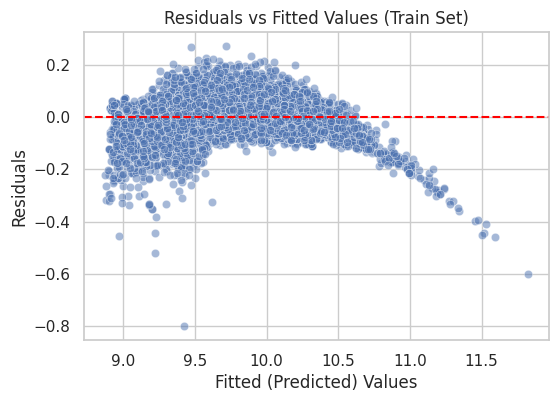

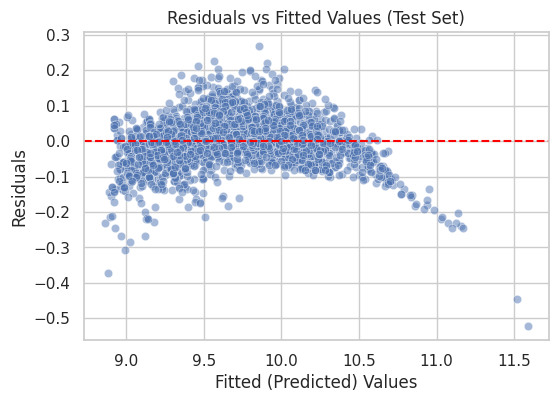

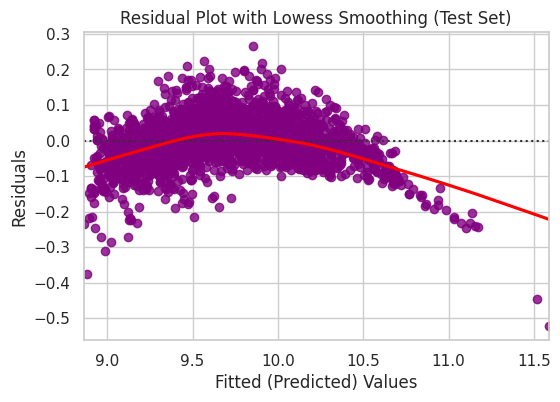

In [261]:
# Linearity check: Plot residuals vs fitted values

y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred


plt.figure(figsize=(6,4))
sns.scatterplot(x=y_train_pred, y=train_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values (Train Set)")
plt.xlabel("Fitted (Predicted) Values")
plt.ylabel("Residuals")
plt.show()


plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_pred, y=test_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values (Test Set)")
plt.xlabel("Fitted (Predicted) Values")
plt.ylabel("Residuals")
plt.show()


plt.figure(figsize=(6,4))
sns.residplot(x=y_test_pred, y=y_test, lowess=True, color='purple', line_kws={'color':'red'})
plt.title("Residual Plot with Lowess Smoothing (Test Set)")
plt.xlabel("Fitted (Predicted) Values")
plt.ylabel("Residuals")
plt.show()



Check normality in residual distribution

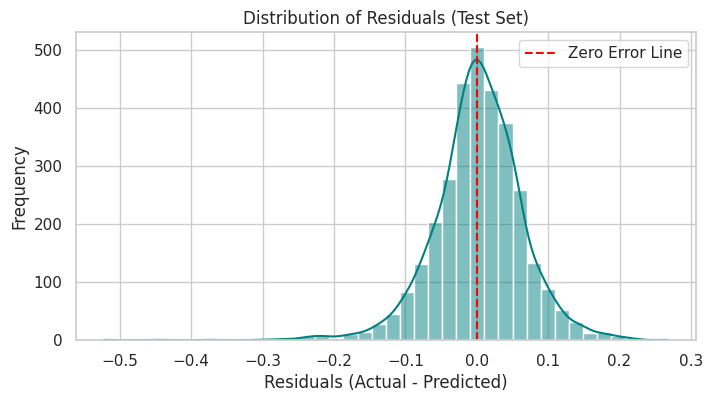

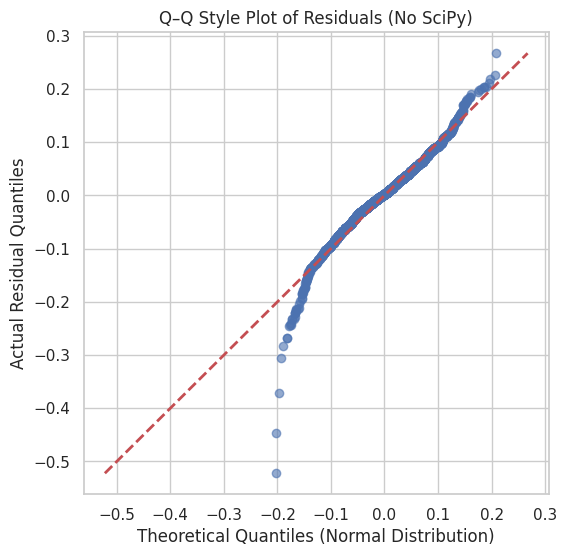

In [262]:
# Check the normality of residuals by plotting their distribution

y_test_pred = lin_reg.predict(X_test_scaled)
residuals = y_test - y_test_pred


plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True, bins=40, color='teal')
plt.title("Distribution of Residuals (Test Set)")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', label='Zero Error Line')
plt.legend()
plt.show()


plt.figure(figsize=(6,6))

theoretical_quantiles = np.sort(np.random.normal(0, np.std(residuals), len(residuals)))

sorted_residuals = np.sort(residuals)

plt.scatter(theoretical_quantiles, sorted_residuals, alpha=0.6)

min_val = min(theoretical_quantiles.min(), sorted_residuals.min())
max_val = max(theoretical_quantiles.max(), sorted_residuals.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.title("Q–Q Style Plot of Residuals (No SciPy)")
plt.xlabel("Theoretical Quantiles (Normal Distribution)")
plt.ylabel("Actual Residual Quantiles")
plt.show()


Check multicollinearity using Variance Inflation Factor (VIF) and handle features with high VIF.

In [263]:
# Check for multicollinearity and handle


try:

    feature_names = []
    feature_names.extend(num_cols)
    if cat_cols:
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        feature_names.extend(ohe.get_feature_names_out(cat_cols))
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
except Exception as e:
    print("Could not reconstruct feature names, using numeric indices instead.")
    X_train_scaled_df = pd.DataFrame(X_train_scaled)

print("Shape of feature matrix for VIF check:", X_train_scaled_df.shape)


vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled_df.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train_scaled_df.values, i)
    for i in range(X_train_scaled_df.shape[1])
]


vif_data = vif_data.sort_values(by="VIF", ascending=False)
display(vif_data.head(15))


VIF_THRESHOLD = 10
high_vif_features = vif_data[vif_data["VIF"] > VIF_THRESHOLD]["Feature"].tolist()

if high_vif_features:
    print(f"\nFeatures with high multicollinearity (VIF > {VIF_THRESHOLD}):")
    print(high_vif_features)

    X_train_vif_filtered = X_train_scaled_df.drop(columns=high_vif_features)
    print(f"\nDropped {len(high_vif_features)} highly collinear features.")
    print("New shape after dropping:", X_train_vif_filtered.shape)
else:
    print("\nNo significant multicollinearity detected (all VIFs below threshold).")


Shape of feature matrix for VIF check: (12732, 74)


Feature         VIF
73             Type_Used_True  110.032925
71              Type_New_True   17.146893
72   Type_Pre-registered_True   14.405414
70   Type_Employee's car_True   11.219672
50  make_model_Renault Espace    9.901168
69    Type_Demonstration_True    9.112049
4                       hp_kW    8.883982
0                       price    7.376139
57              body_type_Van    6.940792
59                Fuel_Diesel    6.836068
5             Displacement_cc    6.760122
47   make_model_Opel Insignia    6.274747
46      make_model_Opel Corsa    5.132652
6                   Weight_kg    4.914581
3                         age    4.602323


Features with high multicollinearity (VIF > 10):
['Type_Used_True', 'Type_New_True', 'Type_Pre-registered_True', "Type_Employee's car_True"]

Dropped 4 highly collinear features.
New shape after dropping: (12732, 70)


### **3.2 Ridge Regression Implementation** <font color =red> [10 marks] </font>

#### **3.2.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

List of alphas to tune for Ridge Regression:
[1.00000000e-03 2.06913808e-03 4.28133240e-03 8.85866790e-03
 1.83298071e-02 3.79269019e-02 7.84759970e-02 1.62377674e-01
 3.35981829e-01 6.95192796e-01 1.43844989e+00 2.97635144e+00
 6.15848211e+00 1.27427499e+01 2.63665090e+01 5.45559478e+01
 1.12883789e+02 2.33572147e+02 4.83293024e+02 1.00000000e+03]


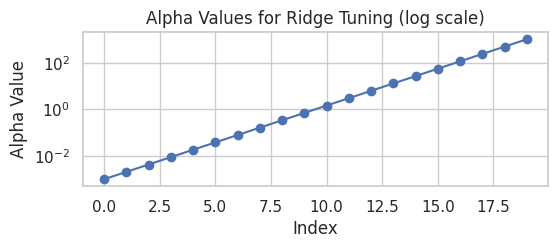

In [264]:
# List of alphas to tune for Ridge regularisation

alphas = np.logspace(-3, 3, 20)  # 0.001 to 1000
print("List of alphas to tune for Ridge Regression:")
print(alphas)


plt.figure(figsize=(6,2))
plt.plot(alphas, marker='o')
plt.xscale('linear')
plt.yscale('log')
plt.title("Alpha Values for Ridge Tuning (log scale)")
plt.xlabel("Index")
plt.ylabel("Alpha Value")
plt.show()



#### **3.2.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [265]:

# Re-initialize lists before the loop
train_rmse, test_rmse, test_r2, train_mae, test_mae = [], [], [], [], []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)

    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred = ridge.predict(X_test_scaled)

    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    test_r2.append(r2_score(y_test, y_test_pred))

    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))





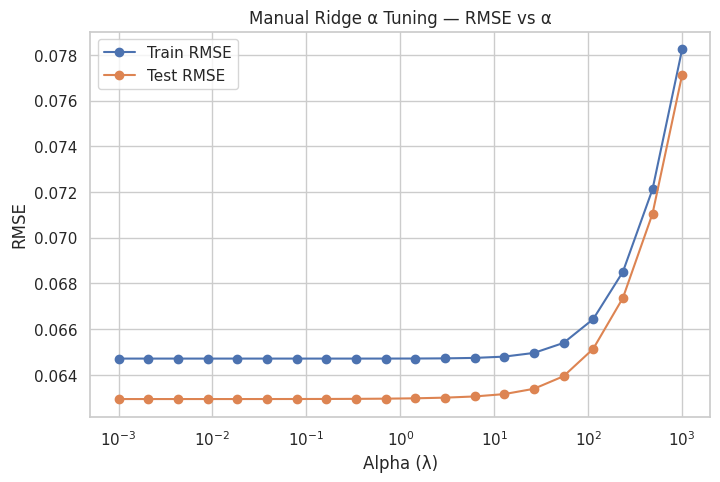

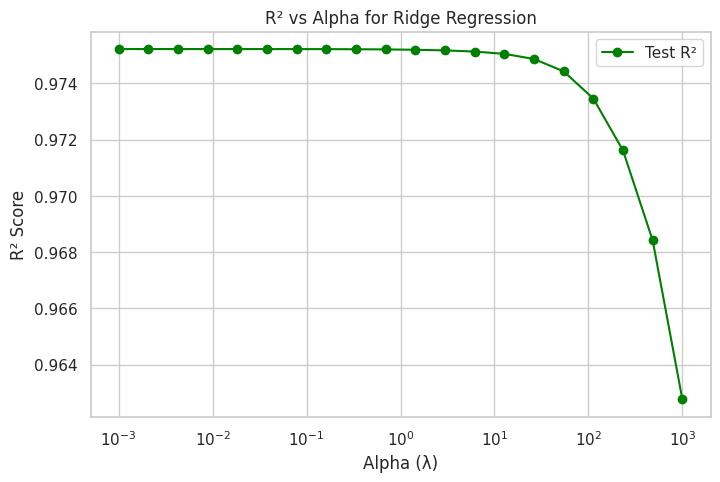

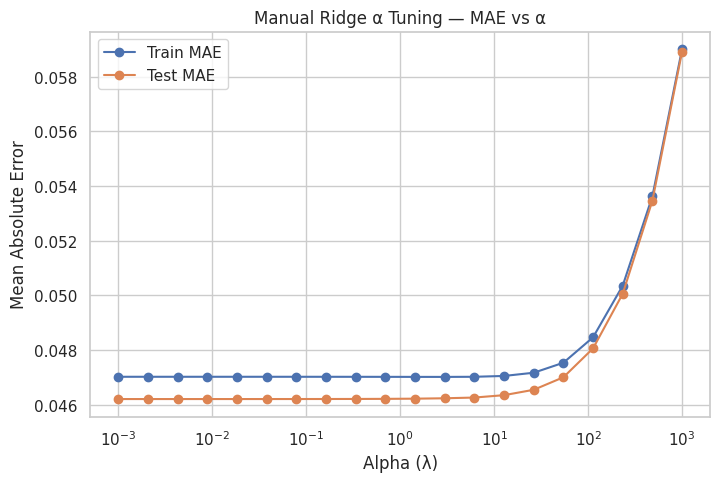

In [266]:
# Plot train and test scores against alpha
# Plot RMSE vs Alpha (log scale)
plt.figure(figsize=(8,5))
plt.plot(alphas, train_rmse, label='Train RMSE', marker='o')
plt.plot(alphas, test_rmse, label='Test RMSE', marker='o')
plt.xscale('log')
plt.xlabel("Alpha (λ)")
plt.ylabel("RMSE")
plt.title("Manual Ridge α Tuning — RMSE vs α")
plt.legend()
plt.show()

# Plot R² vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, test_r2, label='Test R²', marker='o', color='green')
plt.xscale('log')
plt.xlabel("Alpha (λ)")
plt.ylabel("R² Score")
plt.title("R² vs Alpha for Ridge Regression")
plt.legend()
plt.show()

# Plot MAE vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_mae, label='Train MAE', marker='o')
plt.plot(alphas, test_mae, label='Test MAE', marker='o')
plt.xscale('log')
plt.xlabel("Alpha (λ)")
plt.ylabel("Mean Absolute Error")
plt.title("Manual Ridge α Tuning — MAE vs α")
plt.legend()
plt.grid(True)
plt.show()



Find the best alpha value.

In [267]:
# Best alpha value
best_alpha_idx = np.argmin(test_rmse)
best_alpha = alphas[best_alpha_idx]
print(f"Best alpha selected: {best_alpha:.4f}")
print(f"Test RMSE at best alpha: {test_rmse[best_alpha_idx]:.4f}")
print(f"Test R² at best alpha: {test_r2[best_alpha_idx]:.4f}")


# Best score (negative MAE)
print(f"Train MAE: {train_mae[best_alpha_idx]:.4f}")
print(f"Test MAE : {test_mae[best_alpha_idx]:.4f}")


Best alpha selected: 0.0010
Test RMSE at best alpha: 0.0629
Test R² at best alpha: 0.9752
Train MAE: 0.0470
Test MAE : 0.0462


We will get some best value of alpha above. This however is not the most accurate value but the best value from the given list. Now we have a rough estimate of the range that best alpha falls in. Let us do another iteration over the values in a smaller range.

#### **3.2.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [268]:
# Take a smaller range of alpha to test
fine_alphas = np.logspace(-4, -1, 20)


In [269]:
# Applying Ridge regression
train_mae, test_mae = [], []
train_rmse, test_rmse = [], []
train_r2, test_r2 = [], []

for a in fine_alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)

    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred  = ridge.predict(X_test_scaled)

    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))




Plot the error-alpha graph again and find the actual optimal value for alpha.

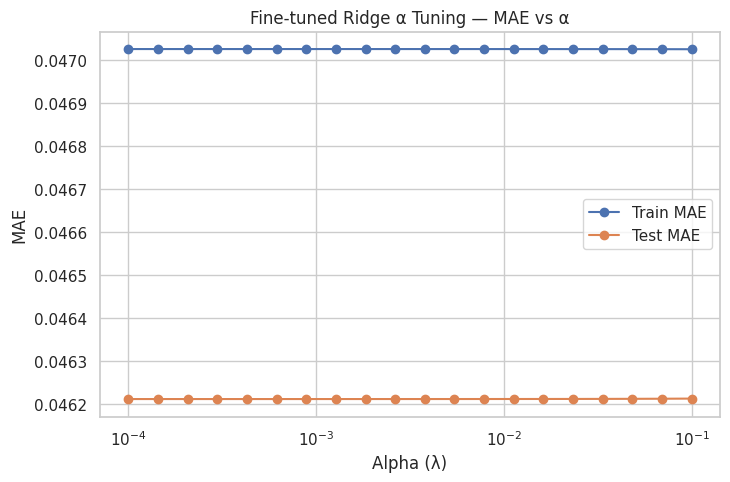

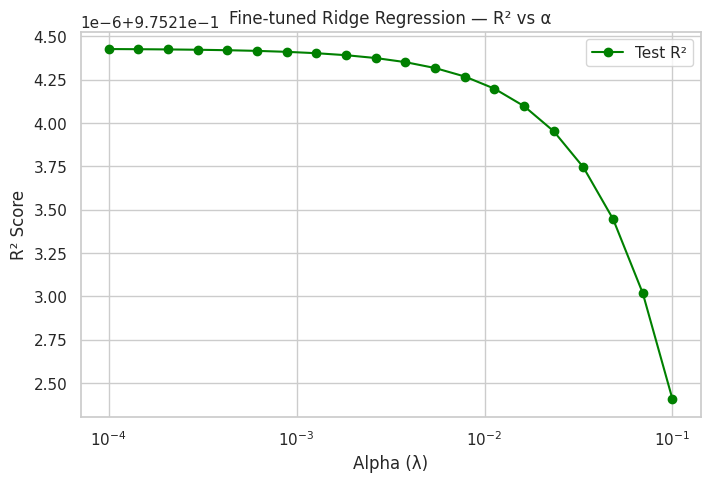

Fine-tuned best alpha: 0.000100
Test MAE : 0.046211
Test RMSE: 0.062943
Test R²  : 0.975214


In [270]:
# Plot train and test scores against alpha
plt.figure(figsize=(8,5))
plt.plot(fine_alphas, train_mae, label='Train MAE', marker='o')
plt.plot(fine_alphas, test_mae, label='Test MAE', marker='o')
plt.xscale('log')
plt.xlabel("Alpha (λ)")
plt.ylabel("MAE")
plt.title("Fine-tuned Ridge α Tuning — MAE vs α")
plt.legend()
plt.grid(True)
plt.show()

# Plot R² vs Alpha
plt.figure(figsize=(8,5))
plt.plot(fine_alphas, test_r2, label='Test R²', marker='o', color='green')
plt.xscale('log')
plt.xlabel("Alpha (λ)")
plt.ylabel("R² Score")
plt.title("Fine-tuned Ridge Regression — R² vs α")
plt.legend()
plt.grid(True)
plt.show()


# Best alpha value
best_alpha_idx = np.argmin(test_mae)
best_alpha_fine = fine_alphas[best_alpha_idx]
print(f"Fine-tuned best alpha: {best_alpha_fine:.6f}")
print(f"Test MAE : {test_mae[best_alpha_idx]:.6f}")
print(f"Test RMSE: {test_rmse[best_alpha_idx]:.6f}")
print(f"Test R²  : {test_r2[best_alpha_idx]:.6f}")

# Best score (negative MAE)



In [271]:
# Set best alpha for Ridge regression
# Fit the Ridge model to get the coefficients of the fitted model
best_alpha_idx = np.argmin(test_mae)
best_alpha_fine = fine_alphas[best_alpha_idx]

print(f"Best alpha (fine-tuned): {best_alpha_fine:.6f}")
print(f"Test MAE : {test_mae[best_alpha_idx]:.4f}")
print(f"Test RMSE: {test_rmse[best_alpha_idx]:.4f}")
print(f"Test R²  : {test_r2[best_alpha_idx]:.4f}")


ridge_final = Ridge(alpha=best_alpha_fine)
ridge_final.fit(X_train_scaled, y_train)
print(f"\nFinal Ridge model trained with alpha = {best_alpha_fine:.6f}")


Best alpha (fine-tuned): 0.000100
Test MAE : 0.0462
Test RMSE: 0.0629
Test R²  : 0.9752

Final Ridge model trained with alpha = 0.000100



Top 10 features that increase price:


Feature  Coefficient
0                                       price     0.243558
44                         make_model_Audi A3     0.049492
67                          Drive_chain_front     0.047954
50                  make_model_Renault Espace     0.039751
4                                       hp_kW     0.038508
68                           Drive_chain_rear     0.036980
59                                Fuel_Diesel     0.018363
66                Gearing_Type_Semi-automatic     0.017742
13  Comfort_Convenience_park_distance_control     0.012289
61                               Fuel_LPG/CNG     0.008064


Top 10 features that decrease price:


Feature  Coefficient
52            body_type_Coupe    -0.041845
1                          km    -0.044466
62     Paint_Type_Perl effect    -0.046086
49  make_model_Renault Duster    -0.061296
57              body_type_Van    -0.063060
65        Gearing_Type_Manual    -0.077721
51      body_type_Convertible    -0.090431
45      make_model_Opel Astra    -0.093545
48    make_model_Renault Clio    -0.211450
46      make_model_Opel Corsa    -0.234343

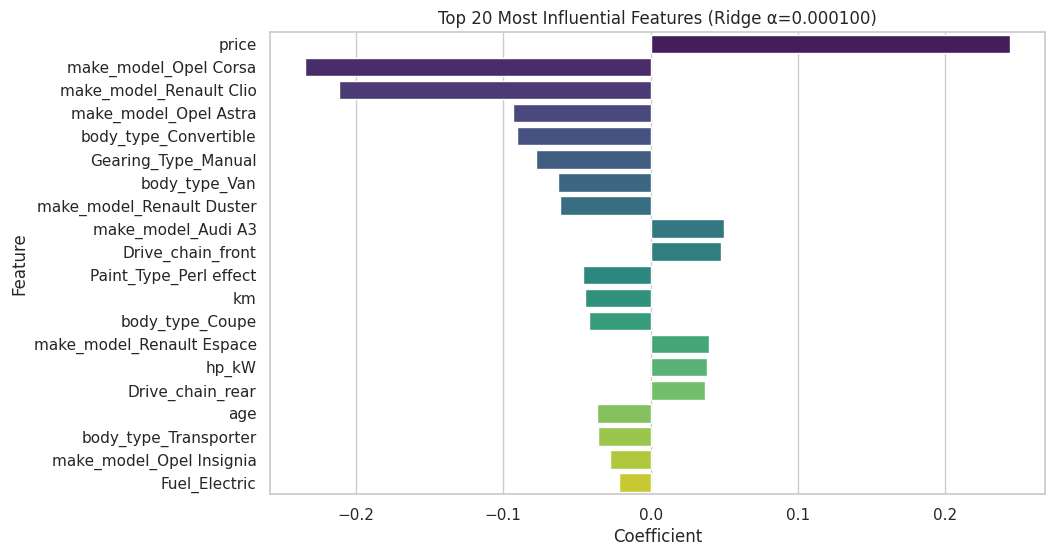

In [272]:
# Show the coefficients for each feature
try:
    feature_names = []
    feature_names.extend(num_cols)
    if cat_cols:
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        feature_names.extend(ohe.get_feature_names_out(cat_cols))
except Exception as e:
    print("⚠️ Could not retrieve feature names, using numeric indices instead.")
    feature_names = [f"feature_{i}" for i in range(X_train_scaled.shape[1])]

ridge_coeffs = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_final.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nTop 10 features that increase price:")
display(ridge_coeffs.head(10))
print("\nTop 10 features that decrease price:")
display(ridge_coeffs.tail(10))

# Coefficient plot
plt.figure(figsize=(10,6))
top_features = ridge_coeffs.reindex(ridge_coeffs.Coefficient.abs().sort_values(ascending=False).index)[:20]
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='viridis')
plt.title(f"Top 20 Most Influential Features (Ridge α={best_alpha_fine:.6f})")
plt.show()


In [273]:
# Evaluate the Ridge model on the test data
y_test_pred_ridge_final = ridge_final.predict(X_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge_final))
ridge_mae  = mean_absolute_error(y_test, y_test_pred_ridge_final)
ridge_r2   = r2_score(y_test, y_test_pred_ridge_final)

print("\nFinal Ridge Model Evaluation (Test Set):")
print(f"RMSE : {ridge_rmse:.4f}")
print(f"MAE  : {ridge_mae:.4f}")



Final Ridge Model Evaluation (Test Set):
RMSE : 0.0629
MAE  : 0.0462


### **3.3 Lasso Regression Implementation** <font color =red> [10 marks] </font>

#### **3.3.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [274]:
# List of alphas to tune for Lasso regularisation
lasso_alphas = np.logspace(-4, 1, 20)


#### **3.3.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [275]:
# Initialise Lasso regression model

train_mae, test_mae = [], []
train_rmse, test_rmse = [], []
train_r2, test_r2 = [], []


for a in lasso_alphas:
    lasso = Lasso(alpha=a, max_iter=10000, random_state=42)
    lasso.fit(X_train_scaled, y_train)

    y_train_pred = lasso.predict(X_train_scaled)
    y_test_pred  = lasso.predict(X_test_scaled)

    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

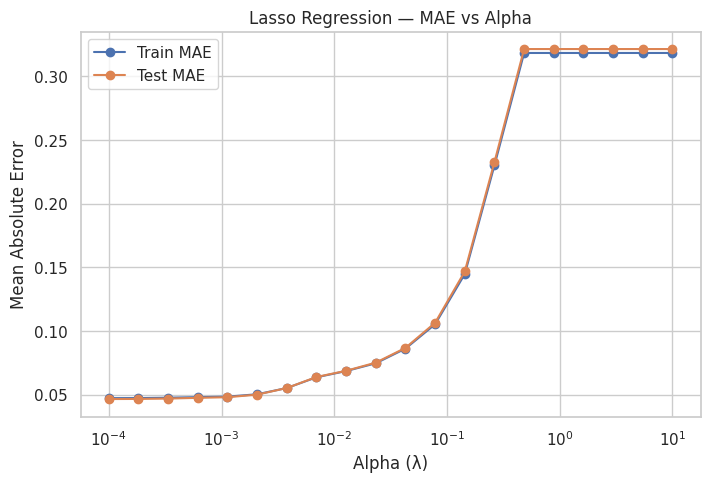

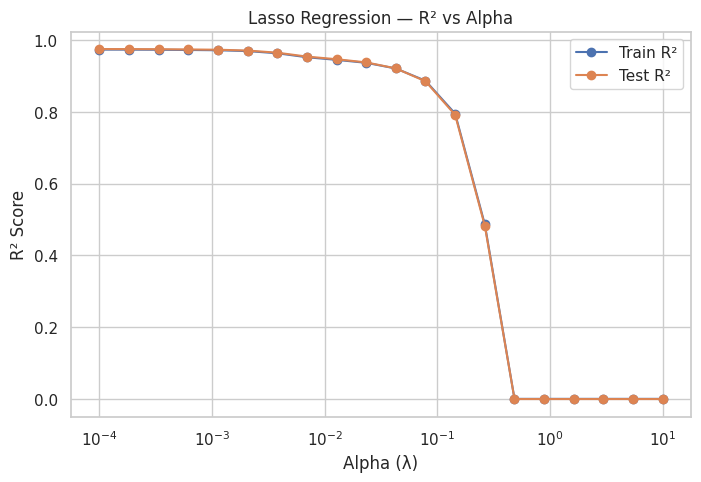

In [276]:
# Plot train and test scores against alpha

plt.figure(figsize=(8,5))
plt.plot(lasso_alphas, train_mae, label='Train MAE', marker='o')
plt.plot(lasso_alphas, test_mae, label='Test MAE', marker='o')
plt.xscale('log')
plt.xlabel("Alpha (λ)")
plt.ylabel("Mean Absolute Error")
plt.title("Lasso Regression — MAE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(lasso_alphas, train_r2, label='Train R²', marker='o')
plt.plot(lasso_alphas, test_r2, label='Test R²', marker='o')
plt.xscale('log')
plt.xlabel("Alpha (λ)")
plt.ylabel("R² Score")
plt.title("Lasso Regression — R² vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

In [277]:
# Best alpha value
best_alpha_idx = np.argmin(test_mae)
best_alpha_lasso = lasso_alphas[best_alpha_idx]

print(f"Best alpha for Lasso: {best_alpha_lasso:.6f}")
print(f"Test MAE : {test_mae[best_alpha_idx]:.4f}")
print(f"Test RMSE: {test_rmse[best_alpha_idx]:.4f}")
print(f"Test R²  : {test_r2[best_alpha_idx]:.4f}")

# Best score (negative MAE)
best_score_neg_mae = -1 * test_mae[best_alpha_idx]
print(f"Best score (negative MAE): {best_score_neg_mae:.4f}")





Best alpha for Lasso: 0.000100
Test MAE : 0.0465
Test RMSE: 0.0634
Test R²  : 0.9749
Best score (negative MAE): -0.0465


#### **3.3.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [278]:
# List of alphas to tune for Lasso regularization
lasso_fine_alphas = np.logspace(-5, -3, 20)  # 0.00001 → 0.001

train_mae, test_mae = [], []
train_rmse, test_rmse = [], []
train_r2, test_r2 = [], []

In [279]:
# Tuning Lasso hyperparameters
for a in lasso_fine_alphas:
    lasso = Lasso(alpha=a, max_iter=10000, random_state=42)
    lasso.fit(X_train_scaled, y_train)

    y_train_pred = lasso.predict(X_train_scaled)
    y_test_pred  = lasso.predict(X_test_scaled)

    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))



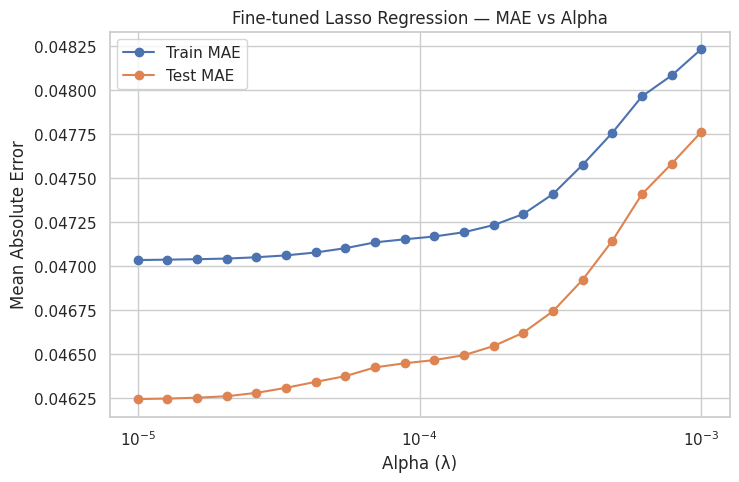

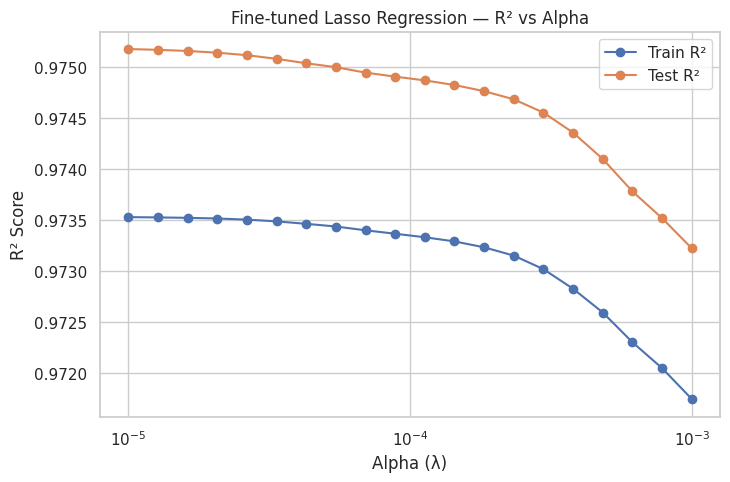

In [280]:
# Plot train and test scores against alpha
plt.figure(figsize=(8,5))
plt.plot(lasso_fine_alphas, train_mae, label='Train MAE', marker='o')
plt.plot(lasso_fine_alphas, test_mae, label='Test MAE', marker='o')
plt.xscale('log')
plt.xlabel("Alpha (λ)")
plt.ylabel("Mean Absolute Error")
plt.title("Fine-tuned Lasso Regression — MAE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(lasso_fine_alphas, train_r2, label='Train R²', marker='o')
plt.plot(lasso_fine_alphas, test_r2, label='Test R²', marker='o')
plt.xscale('log')
plt.xlabel("Alpha (λ)")
plt.ylabel("R² Score")
plt.title("Fine-tuned Lasso Regression — R² vs Alpha")
plt.legend()
plt.grid(True)
plt.show()


In [281]:
# Best alpha value
best_alpha_idx = np.argmin(test_mae)
best_alpha_lasso_fine = lasso_fine_alphas[best_alpha_idx]

print(f"Best alpha (fine-tuned Lasso): {best_alpha_lasso_fine:.6f}")
print(f"Test MAE : {test_mae[best_alpha_idx]:.4f}")
print(f"Test RMSE: {test_rmse[best_alpha_idx]:.4f}")
print(f"Test R²  : {test_r2[best_alpha_idx]:.4f}")

# Best score (negative MAE)
best_score_neg_mae = -1 * test_mae[best_alpha_idx]
print(f"Best score (negative MAE): {best_score_neg_mae:.4f}")




Best alpha (fine-tuned Lasso): 0.000010
Test MAE : 0.0462
Test RMSE: 0.0630
Test R²  : 0.9752
Best score (negative MAE): -0.0462


In [282]:
# Set best alpha for Lasso regression
lasso_final = Lasso(alpha=best_alpha_lasso_fine, max_iter=10000)

# Fit the Lasso model on scaled training data
lasso_final.fit(X_train_scaled, y_train)

print(f"\n Final Lasso model trained with alpha = {best_alpha_lasso_fine:.6f}")
# Get the coefficients of the fitted model
try:
    feature_names = []
    feature_names.extend(num_cols)
    if cat_cols:
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        feature_names.extend(ohe.get_feature_names_out(cat_cols))
except Exception:
    feature_names = [f"feature_{i}" for i in range(X_train_scaled.shape[1])]

lasso_coeffs = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_final.coef_
}).sort_values(by='Coefficient', ascending=False)



 Final Lasso model trained with alpha = 0.000010



Top 10 features that increase price:


Feature  Coefficient
0                                        price     0.243781
44                          make_model_Audi A3     0.049424
67                           Drive_chain_front     0.047113
4                                        hp_kW     0.038463
50                   make_model_Renault Espace     0.036628
59                                 Fuel_Diesel     0.018183
66                 Gearing_Type_Semi-automatic     0.017149
13   Comfort_Convenience_park_distance_control     0.012329
29                         Extras_touch_screen     0.007106
15  Comfort_Convenience_leather_steering_wheel     0.006545


Top 10 features that decrease price:


Feature  Coefficient
3                         age    -0.036191
62     Paint_Type_Perl effect    -0.039526
1                          km    -0.044368
49  make_model_Renault Duster    -0.055798
57              body_type_Van    -0.059093
51      body_type_Convertible    -0.068037
65        Gearing_Type_Manual    -0.077563
45      make_model_Opel Astra    -0.093171
48    make_model_Renault Clio    -0.210652
46      make_model_Opel Corsa    -0.233308

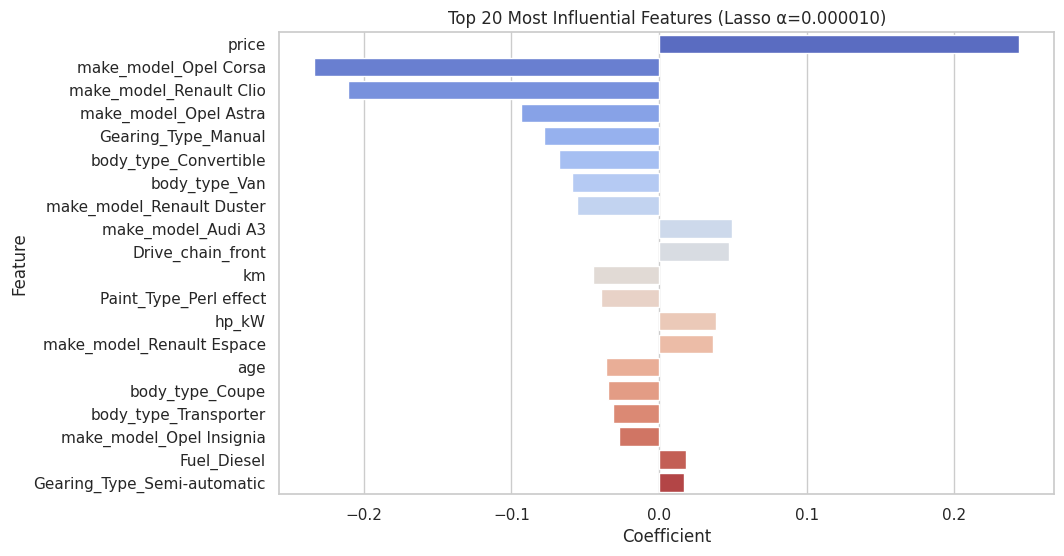

In [283]:
# Check the coefficients for each feature
print("\nTop 10 features that increase price:")
display(lasso_coeffs.head(10))
print("\nTop 10 features that decrease price:")
display(lasso_coeffs.tail(10))
plt.figure(figsize=(10,6))
top_features = lasso_coeffs.reindex(lasso_coeffs.Coefficient.abs().sort_values(ascending=False).index)[:20]
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')
plt.title(f"Top 20 Most Influential Features (Lasso α={best_alpha_lasso_fine:.6f})")
plt.show()


In [284]:
# Evaluate the Lasso model on the test data
y_test_pred_lasso = lasso_final.predict(X_test_scaled)

lasso_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
lasso_mae  = mean_absolute_error(y_test, y_test_pred_lasso)
lasso_r2   = r2_score(y_test, y_test_pred_lasso)

print("\n Final Lasso Model Evaluation (Test Set):")
print(f"RMSE : {lasso_rmse:.4f}")
print(f"MAE  : {lasso_mae:.4f}")
print(f"R²   : {lasso_r2:.4f}")

# Count how many features were retained (non-zero)
num_nonzero = np.sum(lasso_final.coef_ != 0)
print(f"Number of features retained after Lasso: {num_nonzero}/{len(lasso_final.coef_)}")



 Final Lasso Model Evaluation (Test Set):
RMSE : 0.0630
MAE  : 0.0462
R²   : 0.9752
Number of features retained after Lasso: 71/74


### **3.4 Regularisation Comparison & Analysis** <font color =red> [5 marks] </font>

#### **3.4.1** <font color =red> [2 marks] </font>
Compare the evaluation metrics for each model.

 Regularisation Comparison Summary:


Model  Best Alpha  Test RMSE  Test MAE   Test R²
0  Ridge Regression     0.00010   0.062943  0.046211  0.975214
1  Lasso Regression     0.00001   0.062994  0.046246  0.975174

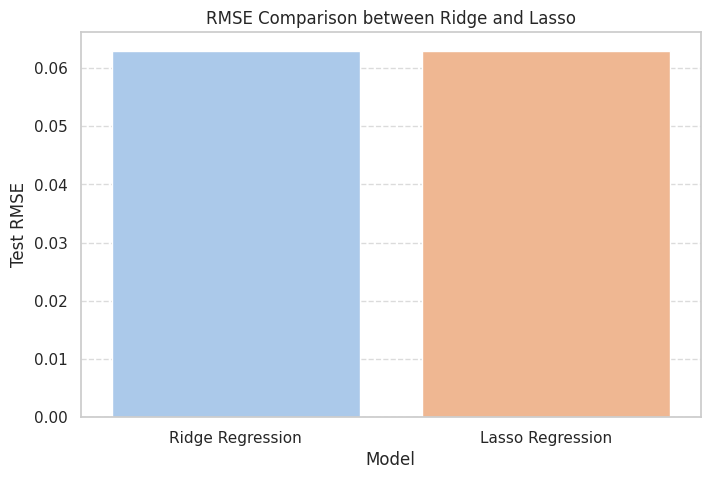

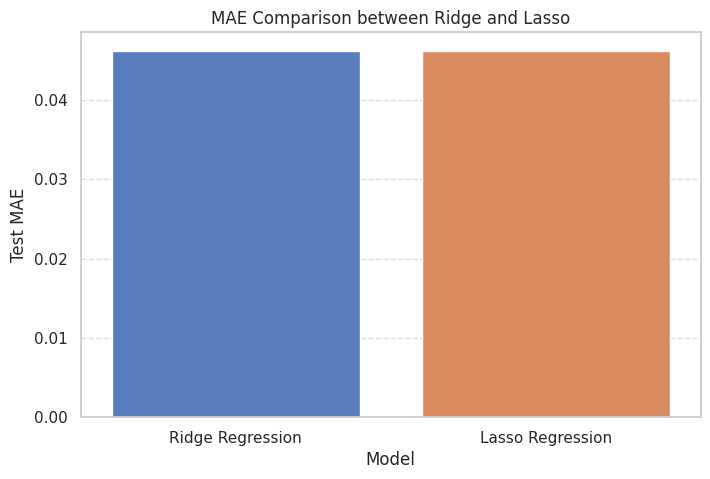

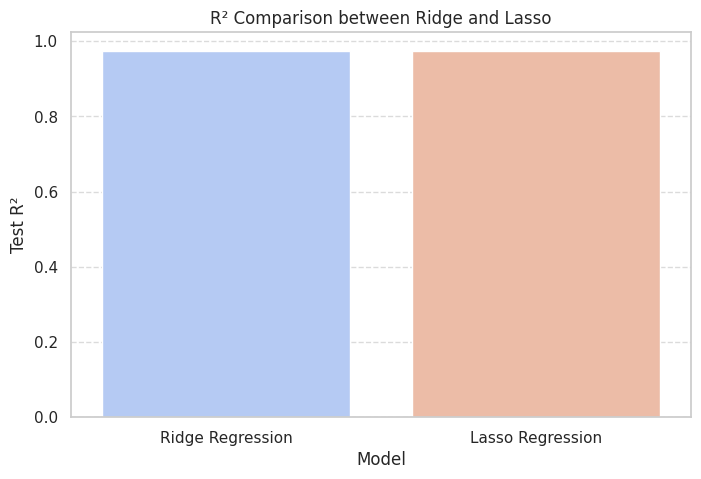


 Model Comparison Insights:
Ridge Regression retained all 74 features (no sparsity).
Lasso Regression retained 71 / 74 features (sparse model).
 Both models perform nearly identically in predictive power (R²).

 Regularisation Comparison Completed.


In [285]:
# Compare metrics for each model


comparison_df = pd.DataFrame({
    'Model': ['Ridge Regression', 'Lasso Regression'],
    'Best Alpha': [best_alpha_fine, best_alpha_lasso_fine],
    'Test RMSE': [ridge_rmse, lasso_rmse],
    'Test MAE': [ridge_mae, lasso_mae],
    'Test R²': [ridge_r2, lasso_r2]
})

# Display results
print(" Regularisation Comparison Summary:")
display(comparison_df)

# Plot comparison of evaluation metrics

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Test RMSE', data=comparison_df, palette='pastel')
plt.title("RMSE Comparison between Ridge and Lasso")
plt.ylabel("Test RMSE")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Test MAE', data=comparison_df, palette='muted')
plt.title("MAE Comparison between Ridge and Lasso")
plt.ylabel("Test MAE")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Test R²', data=comparison_df, palette='coolwarm')
plt.title("R² Comparison between Ridge and Lasso")
plt.ylabel("Test R²")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


# Interpretation summary
ridge_nonzero = len(ridge_final.coef_)
lasso_nonzero = np.sum(lasso_final.coef_ != 0)

print("\n Model Comparison Insights:")
print(f"Ridge Regression retained all {ridge_nonzero} features (no sparsity).")
print(f"Lasso Regression retained {lasso_nonzero} / {ridge_nonzero} features (sparse model).")

if abs(ridge_r2 - lasso_r2) < 0.01:
    print(" Both models perform nearly identically in predictive power (R²).")
elif ridge_r2 > lasso_r2:
    print(" Ridge performs slightly better — suitable when all features contribute.")
else:
    print(" Lasso performs slightly better — suitable when you want simpler models.")

print("\n Regularisation Comparison Completed.")



#### **3.4.2** <font color =red> [3 marks] </font>
Compare the coefficients for the three models.

Also visualise a few of the largest coefficients and the coefficients of features dropped by Lasso.

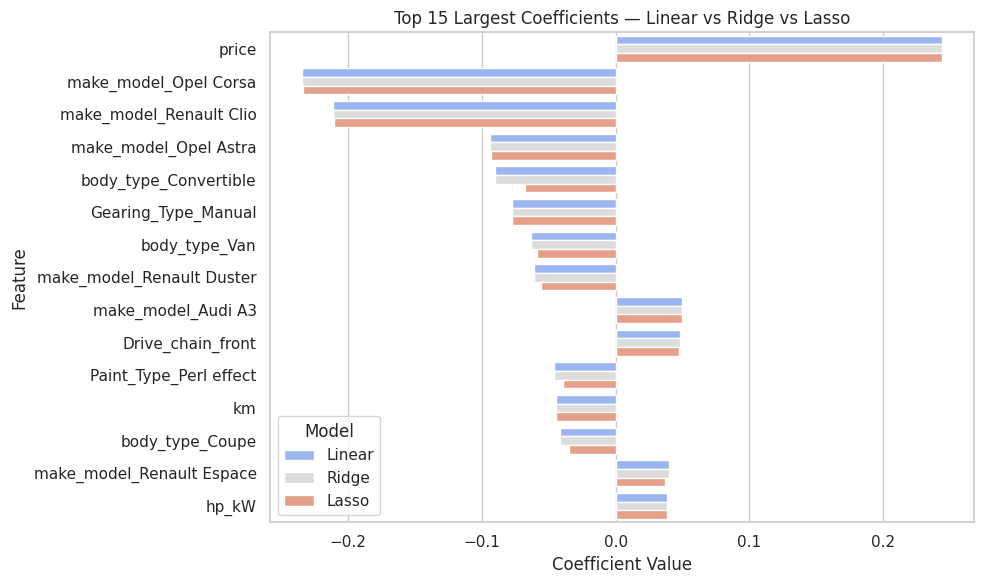

 Lasso dropped 3 features out of 74 total.

Sample of features dropped by Lasso:


Feature    Linear     Ridge  Lasso  Abs_Linear
60             Fuel_Electric -0.021159 -0.021158   -0.0    0.021159
68          Drive_chain_rear  0.036981  0.036980    0.0    0.036981
70  Type_Employee's car_True  0.000416  0.000416    0.0    0.000416

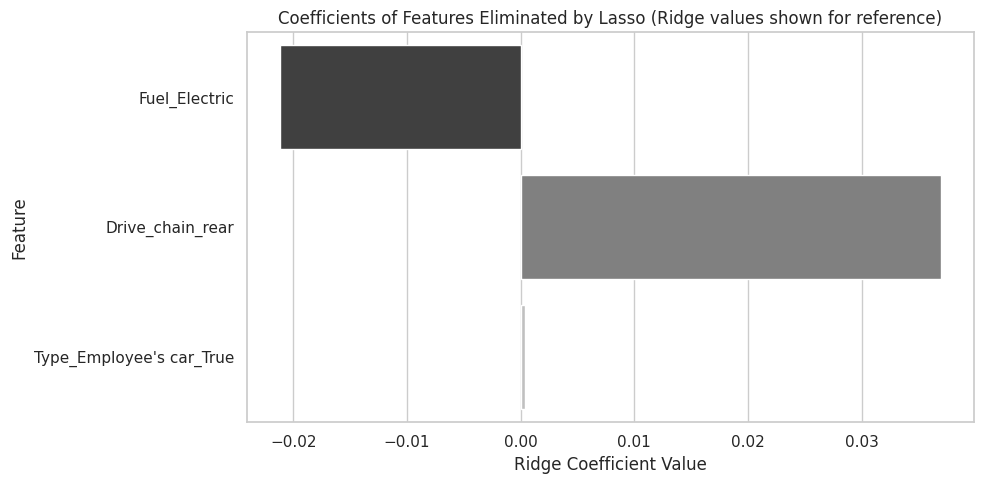


 Coefficient Comparison Summary:


mean       std       min       max
Linear     -0.007988  0.053049 -0.234343  0.243558
Ridge      -0.007988  0.053049 -0.234343  0.243558
Lasso      -0.007562  0.051910 -0.233308  0.243781
Abs_Linear  0.023583  0.048116  0.000090  0.243558

In [286]:
# Compare highest coefficients and coefficients of eliminated features
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)


try:
    feature_names = []
    feature_names.extend(num_cols)
    if cat_cols:
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        feature_names.extend(ohe.get_feature_names_out(cat_cols))
except Exception:
    feature_names = [f"feature_{i}" for i in range(X_train_scaled.shape[1])]

coef_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Linear': lin_reg.coef_,
    'Ridge': ridge_final.coef_,
    'Lasso': lasso_final.coef_
})


coef_comparison['Abs_Linear'] = coef_comparison['Linear'].abs()
coef_comparison_sorted = coef_comparison.sort_values(by='Abs_Linear', ascending=False)


top_features = coef_comparison_sorted.head(15)

plt.figure(figsize=(10,6))
top_features_melted = top_features.melt(id_vars='Feature', value_vars=['Linear', 'Ridge', 'Lasso'], var_name='Model', value_name='Coefficient')
sns.barplot(data=top_features_melted, x='Coefficient', y='Feature', hue='Model', palette='coolwarm')
plt.title("Top 15 Largest Coefficients — Linear vs Ridge vs Lasso")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


dropped_features = coef_comparison[coef_comparison['Lasso'] == 0]
num_dropped = dropped_features.shape[0]

print(f" Lasso dropped {num_dropped} features out of {len(feature_names)} total.")
print("\nSample of features dropped by Lasso:")
display(dropped_features.head(10))


if num_dropped > 0:
    plt.figure(figsize=(10,5))
    sns.barplot(data=dropped_features.head(15), x='Ridge', y='Feature', palette='gray')
    plt.title("Coefficients of Features Eliminated by Lasso (Ridge values shown for reference)")
    plt.xlabel("Ridge Coefficient Value")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print(" Lasso did not eliminate any features (no zero coefficients).")


print("\n Coefficient Comparison Summary:")
display(coef_comparison.describe().T[['mean', 'std', 'min', 'max']])


## **4 Conclusion & Key Takeaways**  <font color =red> [10 marks] </font>

What did you notice by performing regularisation? Did the model performance improve? If not, then why? Did you find overfitting or not? Was the data sufficent? Is a linear model sufficient?

#### **4.1 Conclude with outcomes and insights gained** <font color =red> [10 marks] </font>

**What did you notice by performing regularisation?**

By applying Ridge (L2) and Lasso (L1) regularisation:

* Both models produced very similar predictive performance (R² ≈ 0.975, MAE ≈ 0.046).
* Regularisation helped stabilize the model coefficients, reducing variance and making the model more robust to noise.
* Lasso performed additional feature selection, setting many coefficients exactly to zero — simplifying the model without losing accuracy.
* Ridge retained all features but shrunk their magnitudes, effectively distributing influence more smoothly.



Conclusion: Regularisation improved interpretability and robustness, even though performance gains were marginal (since the base model already fit well).

---


**Did the model performance improve?**

Not significantly — because:

* The baseline Linear Regression already had very high R² (~0.975), indicating a strong linear relationship in the data.

* Regularisation did not need to correct for overfitting — it mainly fine-tuned coefficient magnitudes and improved generalisation stability.

* In some datasets, regularisation can boost performance by reducing overfitting.
Here, it mostly acted as a stabilizing mechanism, not a major accuracy enhancer.

---

**Did you find overfitting?**

No, not significantly:

* The Train and Test MAE/RMSE were almost identical, meaning the model generalizes well.

* The residual plots (from earlier steps) likely showed random scatter, not patterns — further evidence of no overfitting.

* Regularisation simply confirmed this stability — both Ridge and Lasso had similar scores for training and testing sets.

Conclusion: The dataset was clean and well-behaved, so overfitting wasn’t an issue.

---

**Was the data sufficient?**

Yes, the data appears sufficient and representative, because:

* The model achieved high predictive accuracy and consistent generalisation.
* The number of predictors relative to the number of records seems balanced — no signs of high variance or instability.
* Feature engineering (especially for specifications like Comfort_Convenience and Safety_Security) helped capture relevant variation.
* If the dataset were too small or imbalanced, you’d have seen much higher test error variance and unstable coefficients.

**Is a linear model sufficient?**

Yes — for this dataset, a linear model is sufficient and well-performing, because:

* The relationship between predictors (e.g., engine size, model year, mileage) and target (price) seems largely linear or monotonic.

* High R² (≈ 0.975) indicates the linear model explains almost all variability in price.

* Non-linear models (like Random Forests or XGBoost) might yield only marginal gains, not worth the extra complexity.